# Аналитика продаж игр

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Ход исследования**

**1. Откроем файл с данными и изучим общую информацию**
- Путь к файлу: /datasets/games.csv.

**2. Подготовим данные**
- Заменим названия столбцов (приведем к нижнему регистру);
- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
- Обработаем пропуски при необходимости:
    - Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишем причины, которые могли привести к пропускам;
    - Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать;
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

**3. Проведем исследовательский анализ данных**

- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы;
- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ;
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат;
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы;
- Соотнесем выводы с продажами игр на других платформах;
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**4. Составим портрет пользователя каждого региона**

- Определим для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишем различия в долях продаж;
    - Самые популярные жанры (топ-5). Поясним разницу;
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**5. Проверим гипотезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;
- Пороговое значение alpha зададим самостоятельно;
- Поясним:
    - Как мы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.

**6. Напишем общий вывод**

**Описание данных**

- **Name** — название игры;
- **Platform** — платформа;
- **Year_of_Release** — год выпуска;
- **Genre** — жанр игры;
- **NA_sales** — продажи в Северной Америке (миллионы долларов);
- **EU_sales** — продажи в Европе (миллионы долларов);
- **JP_sales** — продажи в Японии (миллионы долларов);
- **Other_sales** — продажи в других странах (миллионы долларов);
- **Critic_Score** — оценка критиков (максимум 100);
- **User_Score** — оценка пользователей (максимум 10);
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**Данные за 2016 год могут быть неполными.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
plt.rcParams ['figure.figsize'] = [13, 6] # заранее задаем размеры графиков

## Откроем файл с данными и изучим общую информацию

In [3]:
try:
    data_games = pd.read_csv('/datasets/games.csv', sep=',')
except:
    data_games = pd.read_csv('games.csv', sep=',')

Выведем первые 10 строк:

In [4]:
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем информацию о датасете и названия столбцов отдельно:

In [5]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Посмотрим на наличие пропусков:

In [7]:
data_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Выведем пропуски в каждом столбце отдельно:

In [8]:
data_games[data_games['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data_games[data_games['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
data_games[data_games['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data_games[data_games['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data_games[data_games['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data_games[data_games['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим какие платформы для игры у нас имеются:

In [14]:
data_games['Platform'].value_counts()

Platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

Посмотрим какие жанры игр мы имеем и нет ли повторений:

In [15]:
data_games['Genre'].value_counts()

Genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

Проверим на наличие явных дубликатов:

In [16]:
data_games.duplicated().sum()

0

**Вывод по файлу:** В нашем распоряжении датафрейм на 16715 строк с информацией об играх (название, платформа, дата выхода, оценки критиков, продажи и др.). Есть ряд наблюдений по датафрейму:
- типы переменных:
    - категориальный: **Name**, **Platform**, **Genre**, **Rating**;
    - количественный: **Year_of_Release**, **NA_sales**, **EU_sales**, **JP_sales**, **Other_sales**, **Critic_Score**, **User_Score**.
- пропуски по столцам **Name**, **Year_of_Release**, **Genre**, **Critic_Score**, **User_Score**, **Rating**:
    - пропуски в столбцах **Name** и **Genre**. Это строки 659 и 14244. Возможно это одна и также игра (год и платформа совпадают). В одной строке храняться данные о продажах в Европе, Америке и иные продажи, а во второй - только по Японии;
    - пропуски в столбце **Year_of_Release**: Аггрегатор игр мог не получить информацию от создателей и/или издателей игр;
    - пропуски в столбцах **Critic_Score**, **User_Score** и **Rating**. Культура оценки критиками игр официально появилась ближе ко второй половине 90-х годов (IGN - 1996, Igromania - 1997, Metacritic - 1998). Поэтому игры выпущенные ранее могли остаться без оценок. Entertainment Software Rating Board - ассоциация, присуждающая рейтинги играм была основана в 1994 году.
- неверные типы столбцов **Year_of_Release** и **User_Score**. Год - целое число, а оценка критика - вещественное;
- назваия столбцов не придерживаются `snake_case`. Необходимо привести их к нижнему регистру;
- столбцы **Name**, **Platform**, **Genre**, **Rating** также необходимо привести к нижнему регисту и повторно проверить на дубликаты.

## Подготовим данные

### Изменение регистра столбцов

Приведем названиия столбцов к нижнему регистру:

In [17]:
data_games.columns = data_games.columns.str.lower()
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Приведем столбцы **name**, **platform**, **genre**, **rating** к нижнему регистру:

In [18]:
for column in data_games[['name','platform','genre','rating']]:
    data_games[column] = data_games[column].str.lower()

### Изменение типов столбцов

Изменим тип данных в столбце **year_of_release**:

In [19]:
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64')

Выведем уникальные значения:

In [20]:
data_games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

Аномалий в столбце не обнаружено, со значениями **NaN** разберемся позже.

Посмотрим столбец **user_score** - его формат `object`, что очень странно, ведь если бы там были только числа и **NaN**, то формат был бы `float`:

In [21]:
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков, видим *tbd*. Посмотрим, сколько таких строк:

In [22]:
data_games[data_games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,e
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,t
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,e
657,frogger's adventures: temple of the frog,gba,<NA>,adventure,2.15,0.18,0.0,0.07,73.0,tbd,e
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,e
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,e
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,e
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,e


2424 строки с подобным значением.

*tbd* является аббревиатурой и расшифровывется как *To Be Determined*. Используется, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.

Заменим данную аббревиатуру на значения **NaN** и изменим тип столбца на `float`:

In [23]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.NaN)
data_games['user_score'] = data_games['user_score'].astype('float')

Со значениями **NaN** разберемся позже.

### Обработаем пропуски

#### Обработка пропусков в столбцах **name** и **genre**:

Пропуски в столбцах **name** и **genre**. Это строки 659 и 14244. Выведем их:

In [24]:
data_games.loc[[659, 14244],:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Восстановить название и жанр не представляется возможным, удалим эти строки:

In [25]:
data_games = data_games.dropna(subset=['name', 'genre'])

#### Обработка пропусков в столбце **year_of_release**:

Выведем пропуски:

In [26]:
data_games[data_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,<NA>,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,<NA>,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,<NA>,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,<NA>,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,<NA>,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,<NA>,sports,0.01,0.00,0.00,0.00,43.0,NaN,e10+
16405,freaky flyers,gc,<NA>,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16448,inversion,pc,<NA>,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,<NA>,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Имеем 269 пропусков. Попробуем восполнить пробелы в годах за счет наличия в датасете информации об одних и тех же играх, только выпущенных для разных платформ:

In [27]:
for i in data_games[data_games['year_of_release'].isnull() == True].index:  
    data_games['year_of_release'][i] = data_games.loc[data_games['name'] == data_games['name'][i], 'year_of_release'].max()

Выведем количество оставшихся пустых значений:

In [28]:
data_games['year_of_release'].isna().sum()

146

Удалим эти значения:

In [29]:
data_games = data_games.dropna(subset=['year_of_release'])

Тип `Int64` для столбца `year_of_release` нам больше не понадобиться, переведем его в тип `int32`:

In [30]:
data_games['year_of_release'] = data_games['year_of_release'].astype('int')

#### Обработка пропусков в столбцах **critic_score**, **user_score**  и **rating**.

В этих столбцах нельзя выявить средние или медианные закономерности по году или жанру. Каждая игра получается индивидуальной, в тоже время оценки критиков и пользователей - субъективное мнение об игре конкретного года, жанра, платформы, студии разработчика, издателя, рекламы и репутации о серии игр. Слишком много факторов необходимо учесть для восстановления данных, поэтому оставим данные без изменений.

### Проверим на аномалии:

С помощью "ящика с усами" мы можем проверить только столбец **year_of_release** относительно каждой платформы:

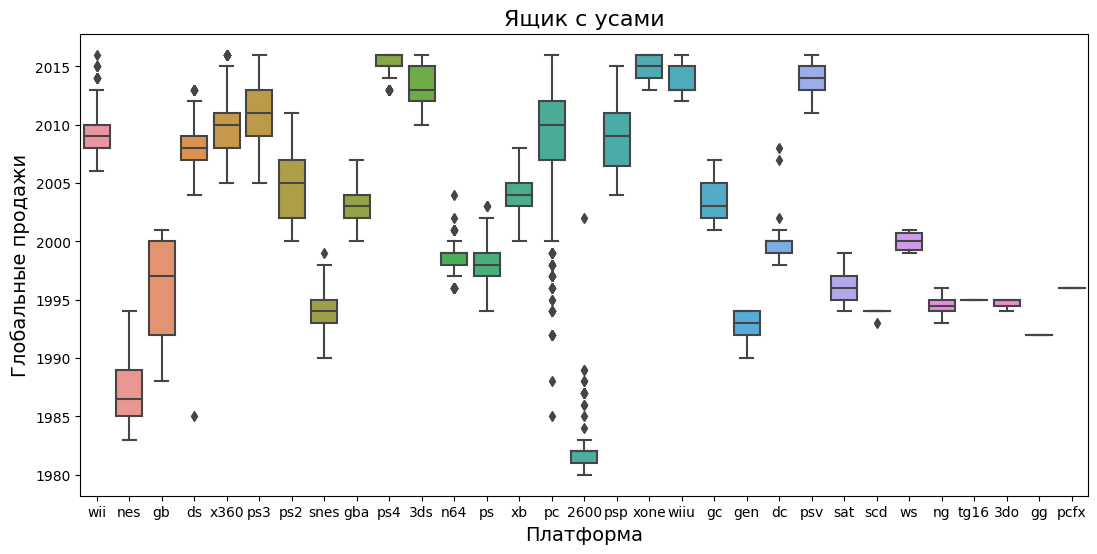

In [31]:
sns.boxplot(data=data_games, x='platform', y='year_of_release')

plt.title('Ящик с усами', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Глобальные продажи',fontsize=14)

plt.show()

Стоит обратить внимание на платформу **DS** и единственный выброс датируемый 1985 годом. Полное название платформы - *Nintendo Dual Screen*. Официальный релиз состоялся в 2004 году. Выведем эту аномалию:

In [32]:
data_games.query('platform == "ds" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


Удалим эту аномалию:

In [33]:
data_games = data_games.drop(labels=15957, axis=0).reset_index(drop=True)

Вторую аномалию можем заметить у платформы **2600**. Аномалия датируется позже 2000 года. Посмотрим на нее:

In [34]:
data_games.query('platform == "2600" and year_of_release > 2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
608,space invaders,2600,2002,shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN


Игра *Space Invaders* дебютировала в 1978 году в Японии. В нее можно было поиграть в том числе и на платформе **Atari 2600**. В 2002 году вышел ремейк данной игры на **PS2** *Space Invaders: Invasion Day* или альтернативное название *Space Raiders*.

В нашем случае это аномалия, удалим ее:

In [35]:
data_games = data_games.drop(labels=608, axis=0).reset_index(drop=True)

Проверим уникальные значения **critic_score** и **user_score**:

In [36]:
data_games['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [37]:
data_games['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

Значений превышающий заданный дианазон для данных столбцов нет.

### Поиск дубликатов

Проверим датасет на наличие явных дубликатов

In [38]:
data_games.duplicated().sum()

0

Теперь для поиска дубликатов будем использовать только столбцы **name**, **platform** и **year_of_release**:

In [39]:
data_games.loc[:, 'name':'year_of_release'].duplicated().sum()

2

Имеем 2 совпадения, выведем их и затем удалим:

In [40]:
dupl = data_games.loc[:, 'name':'year_of_release'].duplicated()
data_games.loc[dupl,:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4105,sonic the hedgehog,ps3,2006,platform,0.0,0.48,0.0,0.0,43.0,4.1,e10+
16085,madden nfl 13,ps3,2012,sports,0.0,0.01,0.0,0.0,83.0,5.5,e


In [41]:
data_games = data_games.drop(labels=[4126, 16227], axis=0).reset_index(drop=True)

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

Создадим отдельный столбец **total_sales** с суммарными продажами:

In [42]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

**Вывод по подготовке данных:** 
- названия столбцов и сами столбцы **name**, **platform**, **genre**, **rating** привели к нижнему регистру;
- изменили типы столбцов **year_of_release** и **user_score** на *int* и *float* соответственно;
- удалили пропуски в столбцах **name**, **genre** и **year_of_release**;
- в столбце **year_of_release** удалось частично восстановить данные за счет тех же игр, но выпущенных на других платформах;
- пропуски в столбцах **critic_score**, **user_score**  и **rating** восстановить не представляется возможным. Оставили без изменений;
- удалили аномалии;
- удалили дубликаты;
- создали отдельный столбец **total_sales** с суммарными продажами.

## Проведем исследовательский анализ данных

### Сколько игр выпускалось в разные годы

In [43]:
year_of_release_piv_t = pd.pivot_table(data_games, index='year_of_release', values='name', aggfunc='count').reset_index()
year_of_release_piv_t.columns = ['year_of_release', 'games_count']
year_of_release_piv_t

,year_of_release,games_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,13
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Выведем данные в виде графика:

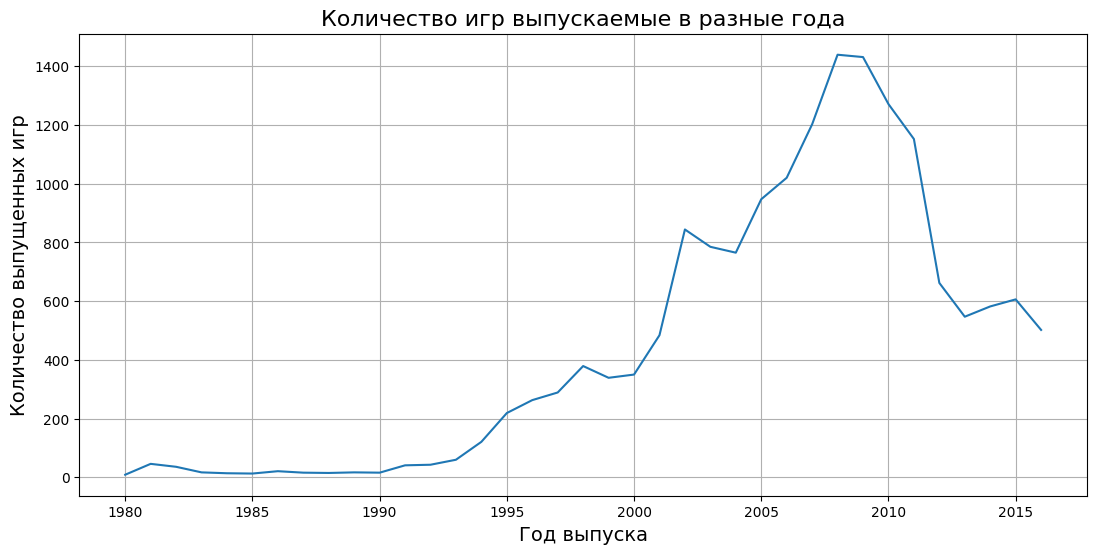

In [44]:
sns.lineplot(data=year_of_release_piv_t, x='year_of_release', y='games_count')

plt.title('Количество игр выпускаемые в разные года', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Количество выпущенных игр', fontsize=14)
plt.grid(True)

plt.show()

**Вывод:**
Для дальнейшего анализа данные по всем периодам не важны.
По графику можно выделить несколько основных этапов, через которые прошла игровая индустрия:
- с 1980 по 1993 года ввиду технического прогресса и доступности игр видим их небольшое количество;
- с 1993 по 2001 виден подъем в количестве выпускаемых игр. Это связанно с удешевлением ПК и игровых приставок. Появились операционные системы, такие как Microsoft Windows и Mac OS. Постепенно набирали популярность игровые приставки, такие как Nintendo, Playstation, позже XBOX. Доступность и распростронение интернета таже внесло свой вклад;
- с 2001 по 2009 резкий подъем связан с увеличением вариативности игровых движков. Сами игры стало проще делать. Покупка игры и самого устройства становиться дешевле с каждым годом и поэтому растет спрос на игры;
- с 2009 по 2016 виден спад в игровой индустрии. Предже всего мировой кризис пережили не все игровые компании, многие завершили свою деятельность. Далее сам игрок стал более критично и требовательно подходить к играм. И наконец многие компании перешли в мобильные игры из-за повсеместного распространения смартфонов.

### Как менялись продажи по платформам

In [45]:
platform_sales_piv_t = pd.pivot_table(data_games, index=['platform'], values='total_sales', aggfunc='sum')
platform_sales_piv_t = platform_sales_piv_t.sort_values('total_sales',ascending=False)
platform_sales_piv_t

,total_sales
platform,
ps2,1247.16
x360,966.61
ps3,935.19
wii,902.85
ds,804.26
ps,727.58
ps4,314.14
gba,313.73
psp,293.56


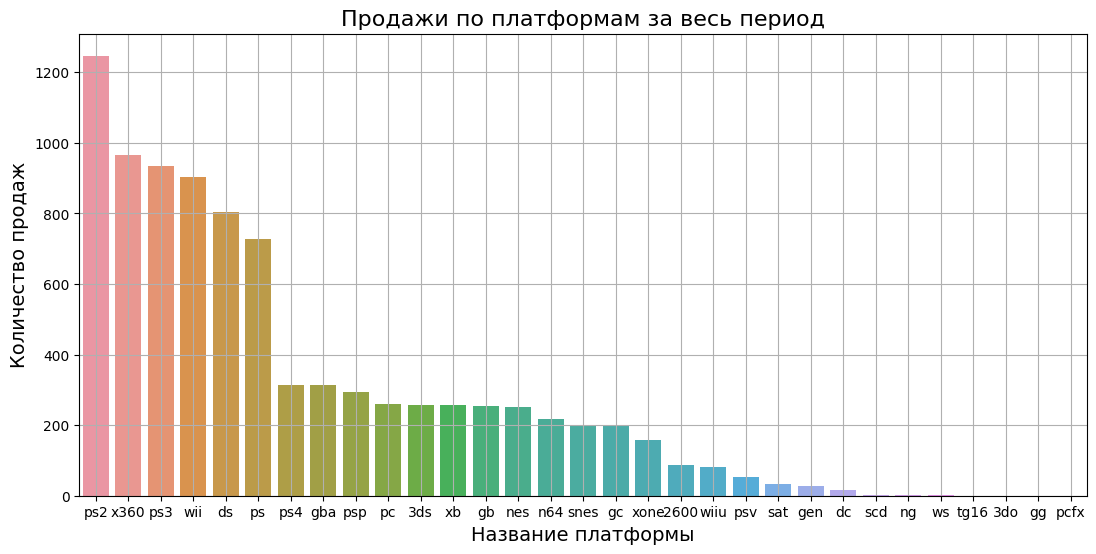

In [46]:
sns.barplot(x=platform_sales_piv_t.index,y=platform_sales_piv_t['total_sales'])

plt.title('Продажи по платформам за весь период', fontsize=16)
plt.xlabel('Название платформы', fontsize=14)
plt.ylabel('Количество продаж', fontsize=14)
plt.grid(True)

plt.show()

На графике видны 6 лидеров по продажам. Выведем их:

In [47]:
best_sales_platform = list(platform_sales_piv_t.index[:6])
best_sales_platform

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

Теперь построим графики для каждой платформы из топа с продажами по годам:

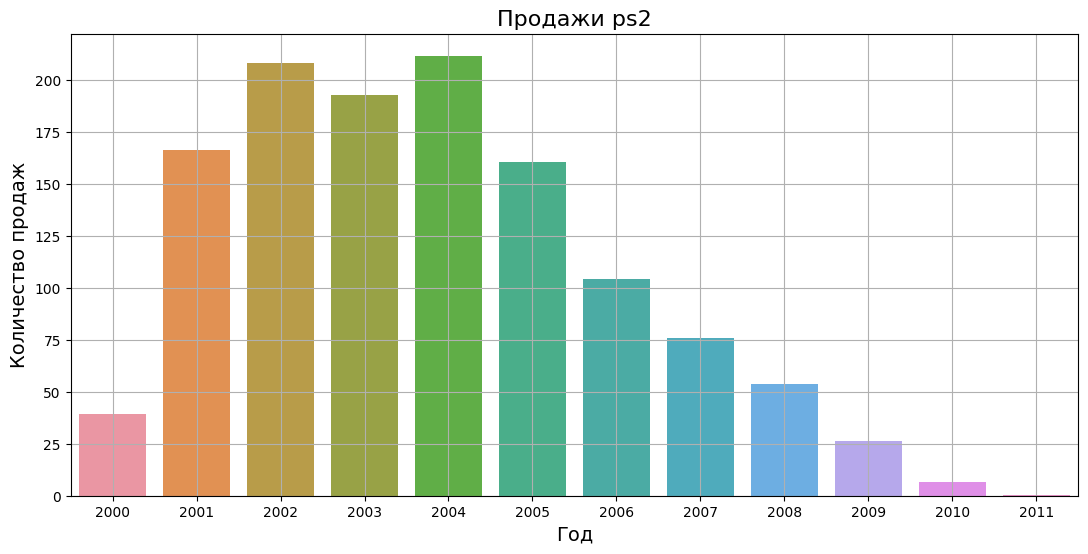

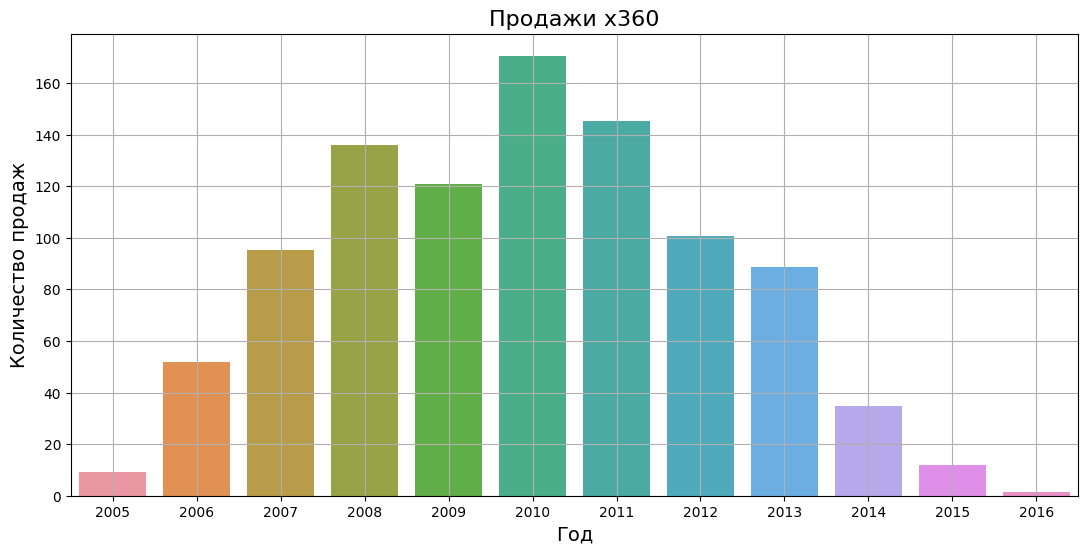

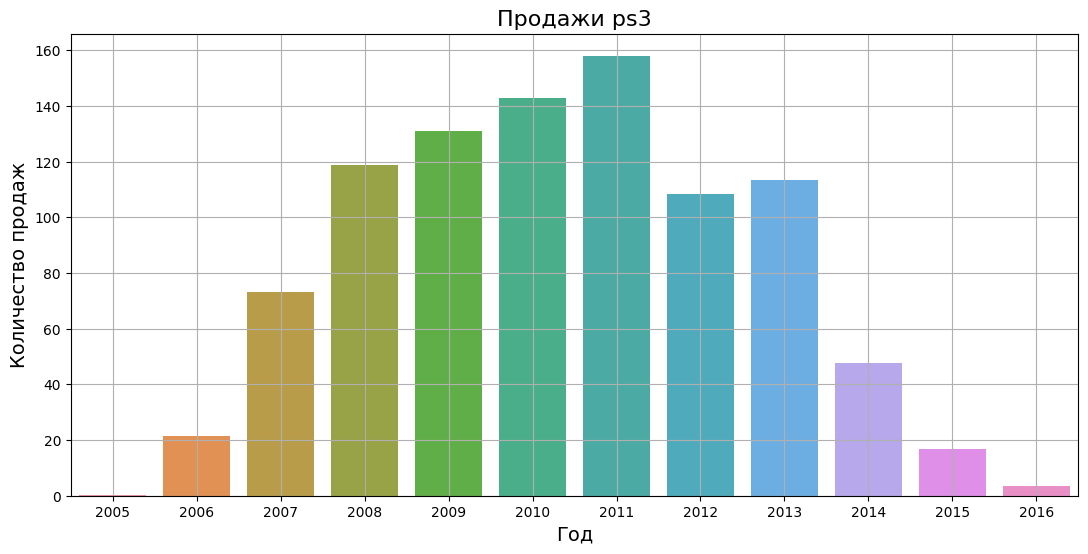

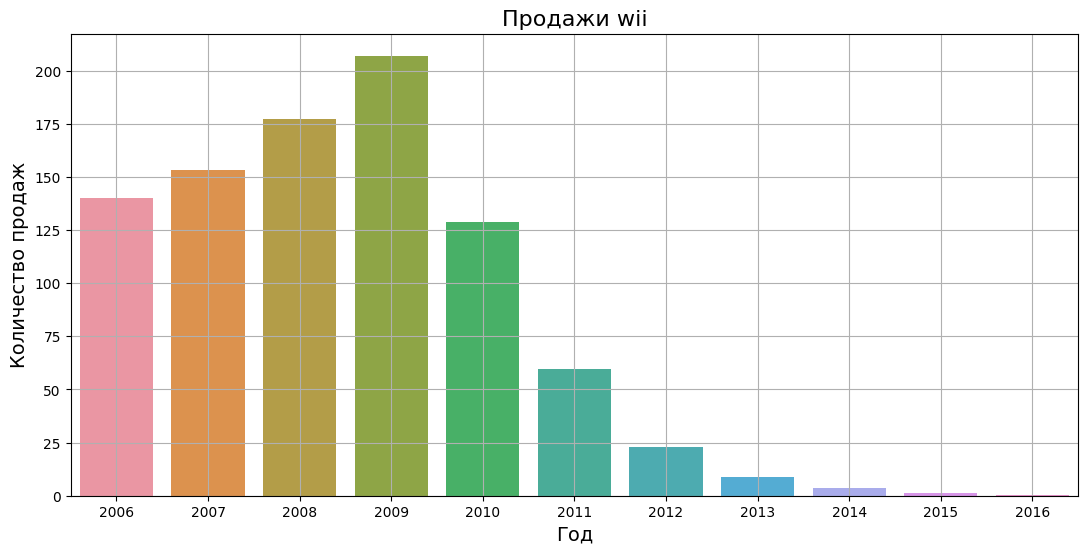

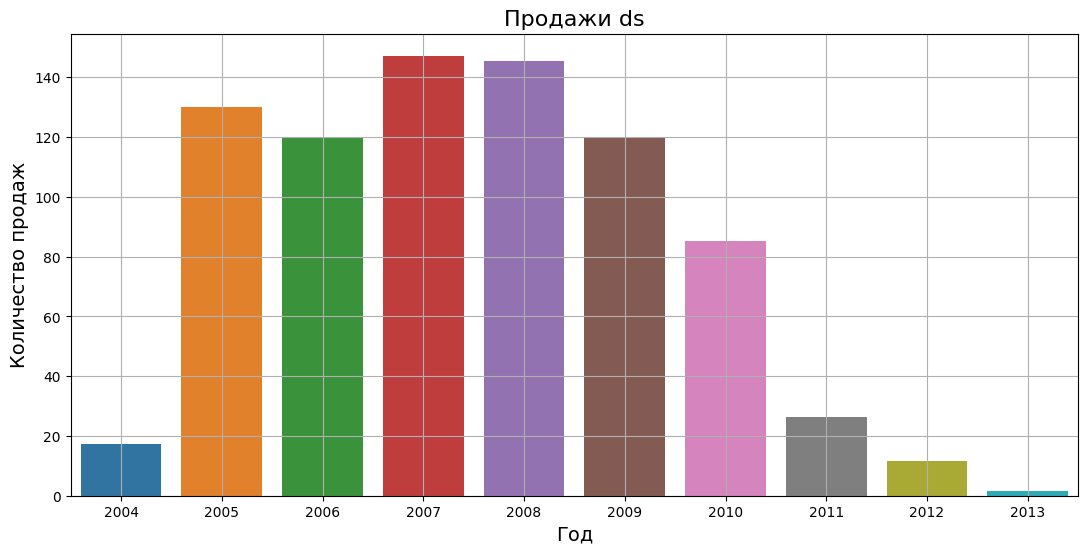

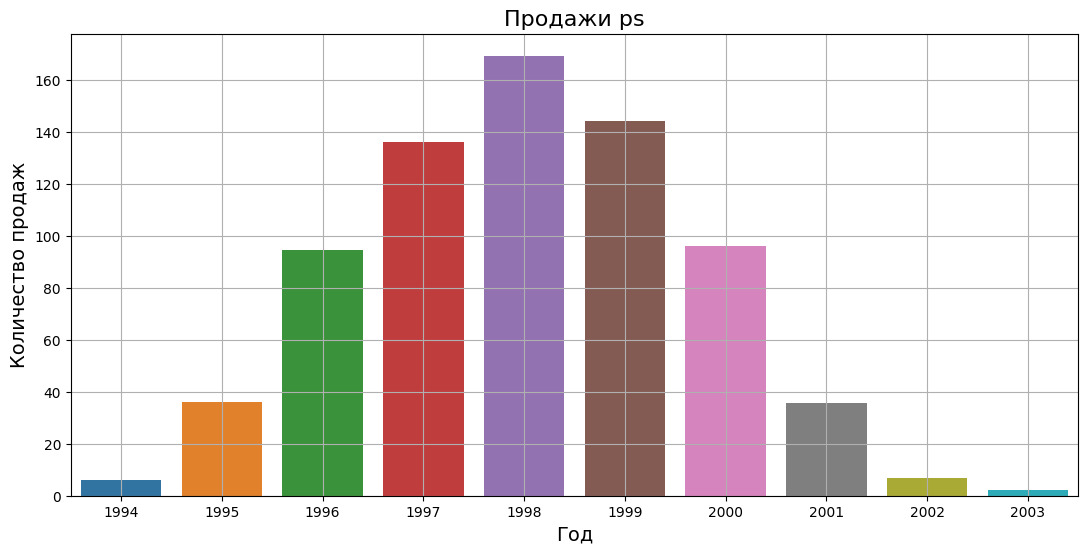

In [48]:
for platform in best_sales_platform:
    p_data = data_games[data_games['platform'] == platform]\
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    
    sns.barplot(x=p_data.index,y=p_data['total_sales'])

    plt.title(f'Продажи {platform}', fontsize=16)
    plt.xlabel('Год', fontsize=14)
    plt.ylabel('Количество продаж', fontsize=14)
    plt.grid(True)
    
    plt.show()

**Вывод:**
- средний период 'жизни' платформы длится 8-12 лет;
- из лидеров продаж только **x360**, **ps3** и **wii** имеют продажи в 2016 году, остальные платформы себя изжили.

### Определим самостоятельно актуальный период для построения прогноза на 2017 год и выберем несколько потенциально прибыльных платформ

Актуальным периодом по продажам считаю с 2013 по 2016 год:
- появление на рынке новых платформ консолей (**PS4** и **Xbox ONE**) говорит от том, что они просуществуют 2-4 года и топ продаж ожидается на 2017 год;
- тоже самое касается и портативных консолей **Nintendo 3DS** (3ds), **PlayStation Vita** (psv) и **Wii U**;
- не стоит забывать и про **PC**. Игры на персональные компьютеры имеют стабильную аудиторию.

In [49]:
actual_period = data_games.query('year_of_release > 2012')
actual_period.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 16 to 16562
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2237 non-null   object 
 1   platform         2237 non-null   object 
 2   year_of_release  2237 non-null   int32  
 3   genre            2237 non-null   object 
 4   na_sales         2237 non-null   float64
 5   eu_sales         2237 non-null   float64
 6   jp_sales         2237 non-null   float64
 7   other_sales      2237 non-null   float64
 8   critic_score     994 non-null    float64
 9   user_score       1195 non-null   float64
 10  rating           1259 non-null   object 
 11  total_sales      2237 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.5+ KB


In [50]:
actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62


На основе данных за актуальный период выберем самые прибыльные платформы:

In [51]:
best_sales_platform = pd.pivot_table(actual_period, index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
best_sales_platform

total_sales
platform year_of_release             
3ds      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
ds       2013                    1.54
pc       2013                   12.66
         2014                   13.63
         2015                    8.52
         2016                    5.25
ps3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
ps4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
psp      2013                    3.38
         2014                    0.24
         2015                    0.12
psv      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
wiiu     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
x360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
xone     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [52]:
best_sales_platform = pd.pivot_table(actual_period, index='platform', values='total_sales', aggfunc='sum')
best_sales_platform.sort_values('total_sales', ascending=False)

,total_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80
wiiu,64.63
pc,40.06
psv,32.99
wii,13.66


**Вывод:**
- топ 5 платформ по миру: **ps4**, **ps3**, **xone**, **x360** и **3ds** за актуальный период;
- растут продажи у **ps4**, **xone**, **3ds**, **wiiu** и **psv**, т.к. они заменяют предыдущее поколение игровых приставок (**ps3**, **x360** и др.);
- **pc** так же включаем в топ платформы, т.к. они имеют свою стабильную аудиторию.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

В итоговый список потенциально прибыльных платформ вошли **ps4**, **xone**, **3ds**, **wiiu**, **psv** и **pc**. Добавим их в отдельную переменную:

In [53]:
list_of_top_6 = ['ps4','xone','pc','wiiu','3ds', 'psv']
top_6_platforms = actual_period[actual_period['platform'].isin(list_of_top_6 )]
top_6_platforms.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1031,nba 2k15,xone,2014,sports,1.37,0.18,0.00,0.18,82.0,6.3,e,1.73
14774,aegis of earth: protonovus assault,ps4,2016,action,0.02,0.00,0.00,0.00,57.0,7.8,t,0.02
5151,sword art online: lost song,psv,2015,role-playing,0.06,0.04,0.23,0.03,70.0,7.1,t,0.36
13016,downtown no gaki no tsukai yaarahen de!! zetta...,3ds,2015,action,0.00,0.00,0.05,0.00,NaN,NaN,NaN,0.05
15491,lovely x cation 1 & 2,psv,2015,action,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
5911,disney infinity,3ds,2013,action,0.17,0.10,0.00,0.02,NaN,NaN,NaN,0.29
11137,kuroko's basketball: ties to future,3ds,2015,action,0.00,0.00,0.09,0.00,NaN,NaN,NaN,0.09
2553,final fantasy x / x-2 hd remaster,psv,2013,role-playing,0.16,0.24,0.28,0.12,86.0,8.5,t,0.80
13898,winning post 8,psv,2014,racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
16496,mushi bugyou,3ds,2013,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [54]:
top_6_platforms['total_sales'].describe()

count    1607.00000
mean        0.46944
std         1.14997
min         0.01000
25%         0.03000
50%         0.10000
75%         0.36000
max        14.63000
Name: total_sales, dtype: float64

Посмотрим как распределяются продажи при применении "ящика с усами" для каждой платформы:

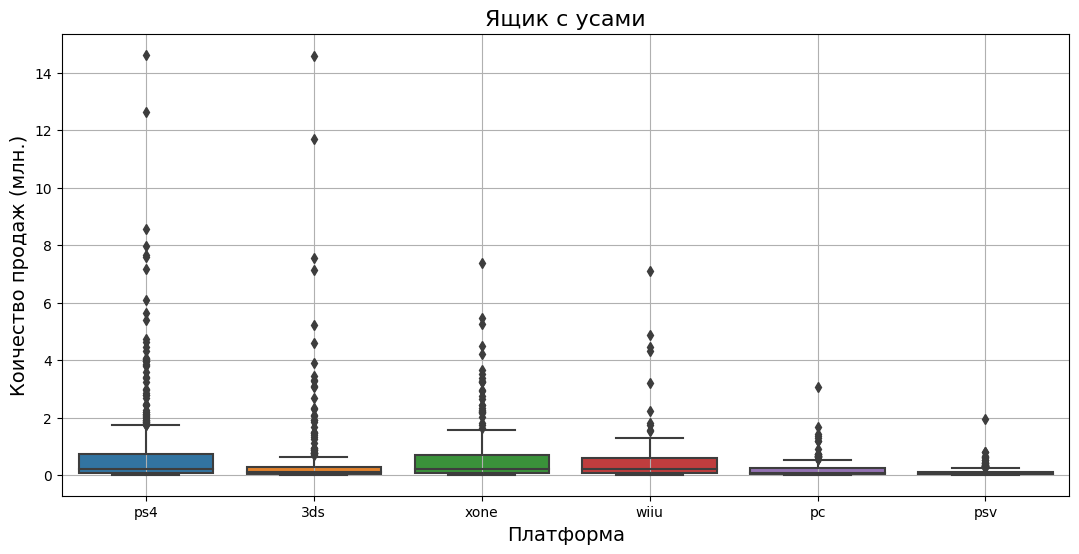

In [55]:
sns.boxplot(data=top_6_platforms, x='platform', y='total_sales')

plt.title('Ящик с усами', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Коичество продаж (млн.)',fontsize=14)
plt.grid(True)

plt.show()

На графике видны аномалии с продажами свыше 14 млн. Для более детального анализа установим вертикальный лимит на графике до 2 млн копий:

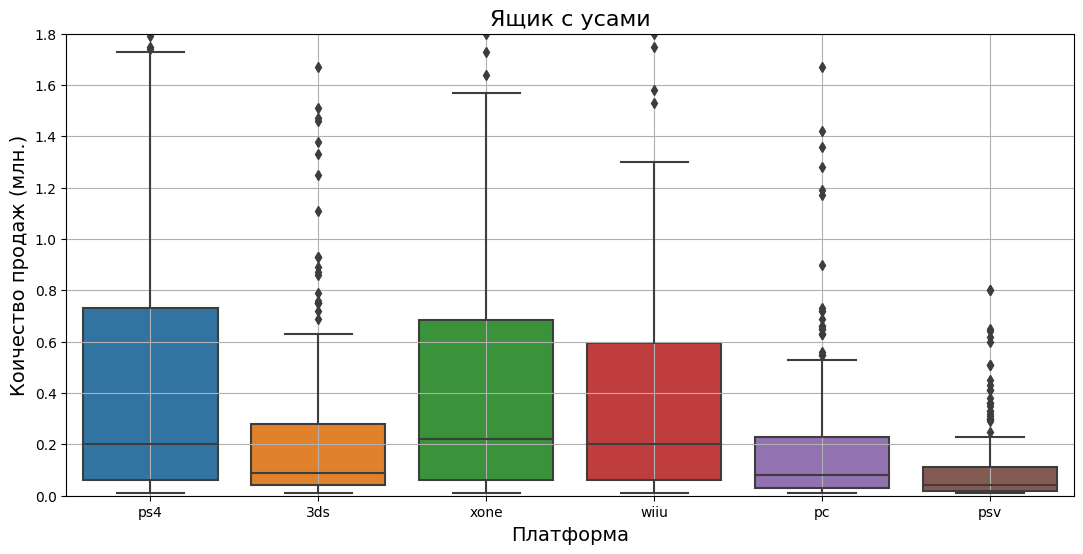

In [56]:
sns.boxplot(data=top_6_platforms, x='platform', y='total_sales')

plt.title('Ящик с усами', fontsize=16)
plt.ylim([0, 1.8])
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Коичество продаж (млн.)',fontsize=14)
plt.grid(True)

plt.show()

In [57]:
top_6_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,303.0,0.472772,1.381347,0.01,0.04,0.09,0.280,14.60
pc,192.0,0.208646,0.349801,0.01,0.03,0.08,0.230,3.05
ps4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
psv,358.0,0.092151,0.153816,0.01,0.02,0.04,0.110,1.96
wiiu,115.0,0.562000,1.038778,0.01,0.06,0.20,0.595,7.09
xone,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


**Вывод:** 
- **ps4**, **xone** и **wiiu** имеют примерно одинаковую медиану по продажам (200 тыс. долларов, 220 тыс. и 200 тыс. соответственно). Из представленных платформ данная медиана является максимальной. Размер "коробок" также выделяет их на фоне остальных;
- **3ds** и **pc** имеют средние значения относительно выбранных платформ (90 тыс. и 80 тыс. соответственно). Несмотря на то, что количество продажу у **3ds** больше чем у **xone** и **wiiu**, прибыли они приносят меньше;
- **psv** находится на последнем месте с медианой в 40 тыс. долларов. Стоит отметить, что данная платформа является 2-й после  **ps4** по количеству продаж;
- **ps4** и **xone** давние конкуренты. Их успех частично обусловлен репутацией своих предшественников. Успех **wiiu** также частично обусловлен репутацией предшественника, а так же наличием сенсорного экрана, что и выделяет ее на фоне других консолей;
- ситуация с **pc** обусловлена попыткой общества подчеркнуть, что консоли созданы для игр, а **pc** для работы. При этом **pc** всеравно имеет свою преданную аудиторию;
- количества продаж свыше 14 млн. долларов добились только **ps4** и **3ds**.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

В качестве популярной платформы возьмем **ps4**. Данная платформа показала неплохие средние результаты по продажам, лидирует по количеству продаж в рамках выбранного периода и ее предшественники, были лидерами продаж в своем поколении.

In [58]:
ps4_actual_data_games = top_6_platforms.query('platform == "ps4"')
ps4_actual_data_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15461,winning post 8 2016,ps4,2016,simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
8185,toukiden kiwami,ps4,2015,action,0.05,0.07,0.02,0.02,74.0,7.6,t,0.16
13323,ride 2,ps4,2016,racing,0.00,0.04,0.00,0.01,71.0,8.0,e,0.05
13799,metal gear solid v: the definitive experience,ps4,2016,action,0.01,0.02,0.01,0.00,NaN,7.8,m,0.04
10802,devil may cry 4,ps4,2015,action,0.01,0.00,0.08,0.00,NaN,NaN,NaN,0.09
13553,nitroplus blasterz: heroines infinite duel,ps4,2015,fighting,0.01,0.00,0.02,0.00,70.0,6.9,t,0.03
5077,bioshock the collection,ps4,2016,shooter,0.10,0.19,0.02,0.06,84.0,8.5,m,0.37
14088,duke nukem 3d: 20th anniversary world tour,ps4,2016,shooter,0.03,0.00,0.00,0.01,77.0,6.9,m,0.04
8144,yakuza zero: the place of oath,ps4,2015,action,0.00,0.00,0.17,0.00,NaN,NaN,NaN,0.17
8543,yakuza kiwami,ps4,2016,adventure,0.00,0.00,0.16,0.00,NaN,NaN,NaN,0.16


Для дальнейшего анализа оставим только столбцы **total_sales**, **critic_score** и **user_score**

In [59]:
ps4_sales_crit_and_user = ps4_actual_data_games.loc[:,['total_sales', 'critic_score', 'user_score']]
ps4_sales_crit_and_user.sample(10)

,total_sales,critic_score,user_score
2505,0.82,NaN,NaN
6127,0.29,NaN,NaN
171,5.39,93.0,7.9
6705,0.24,NaN,NaN
8081,0.18,67.0,8.0
298,4.04,85.0,7.7
4624,0.42,75.0,5.5
1869,1.08,83.0,6.6
10324,0.11,NaN,NaN
10172,0.12,NaN,NaN


In [60]:
ps4_sales_crit_and_user.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


C:\Users\kiril\practicum\practicum_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


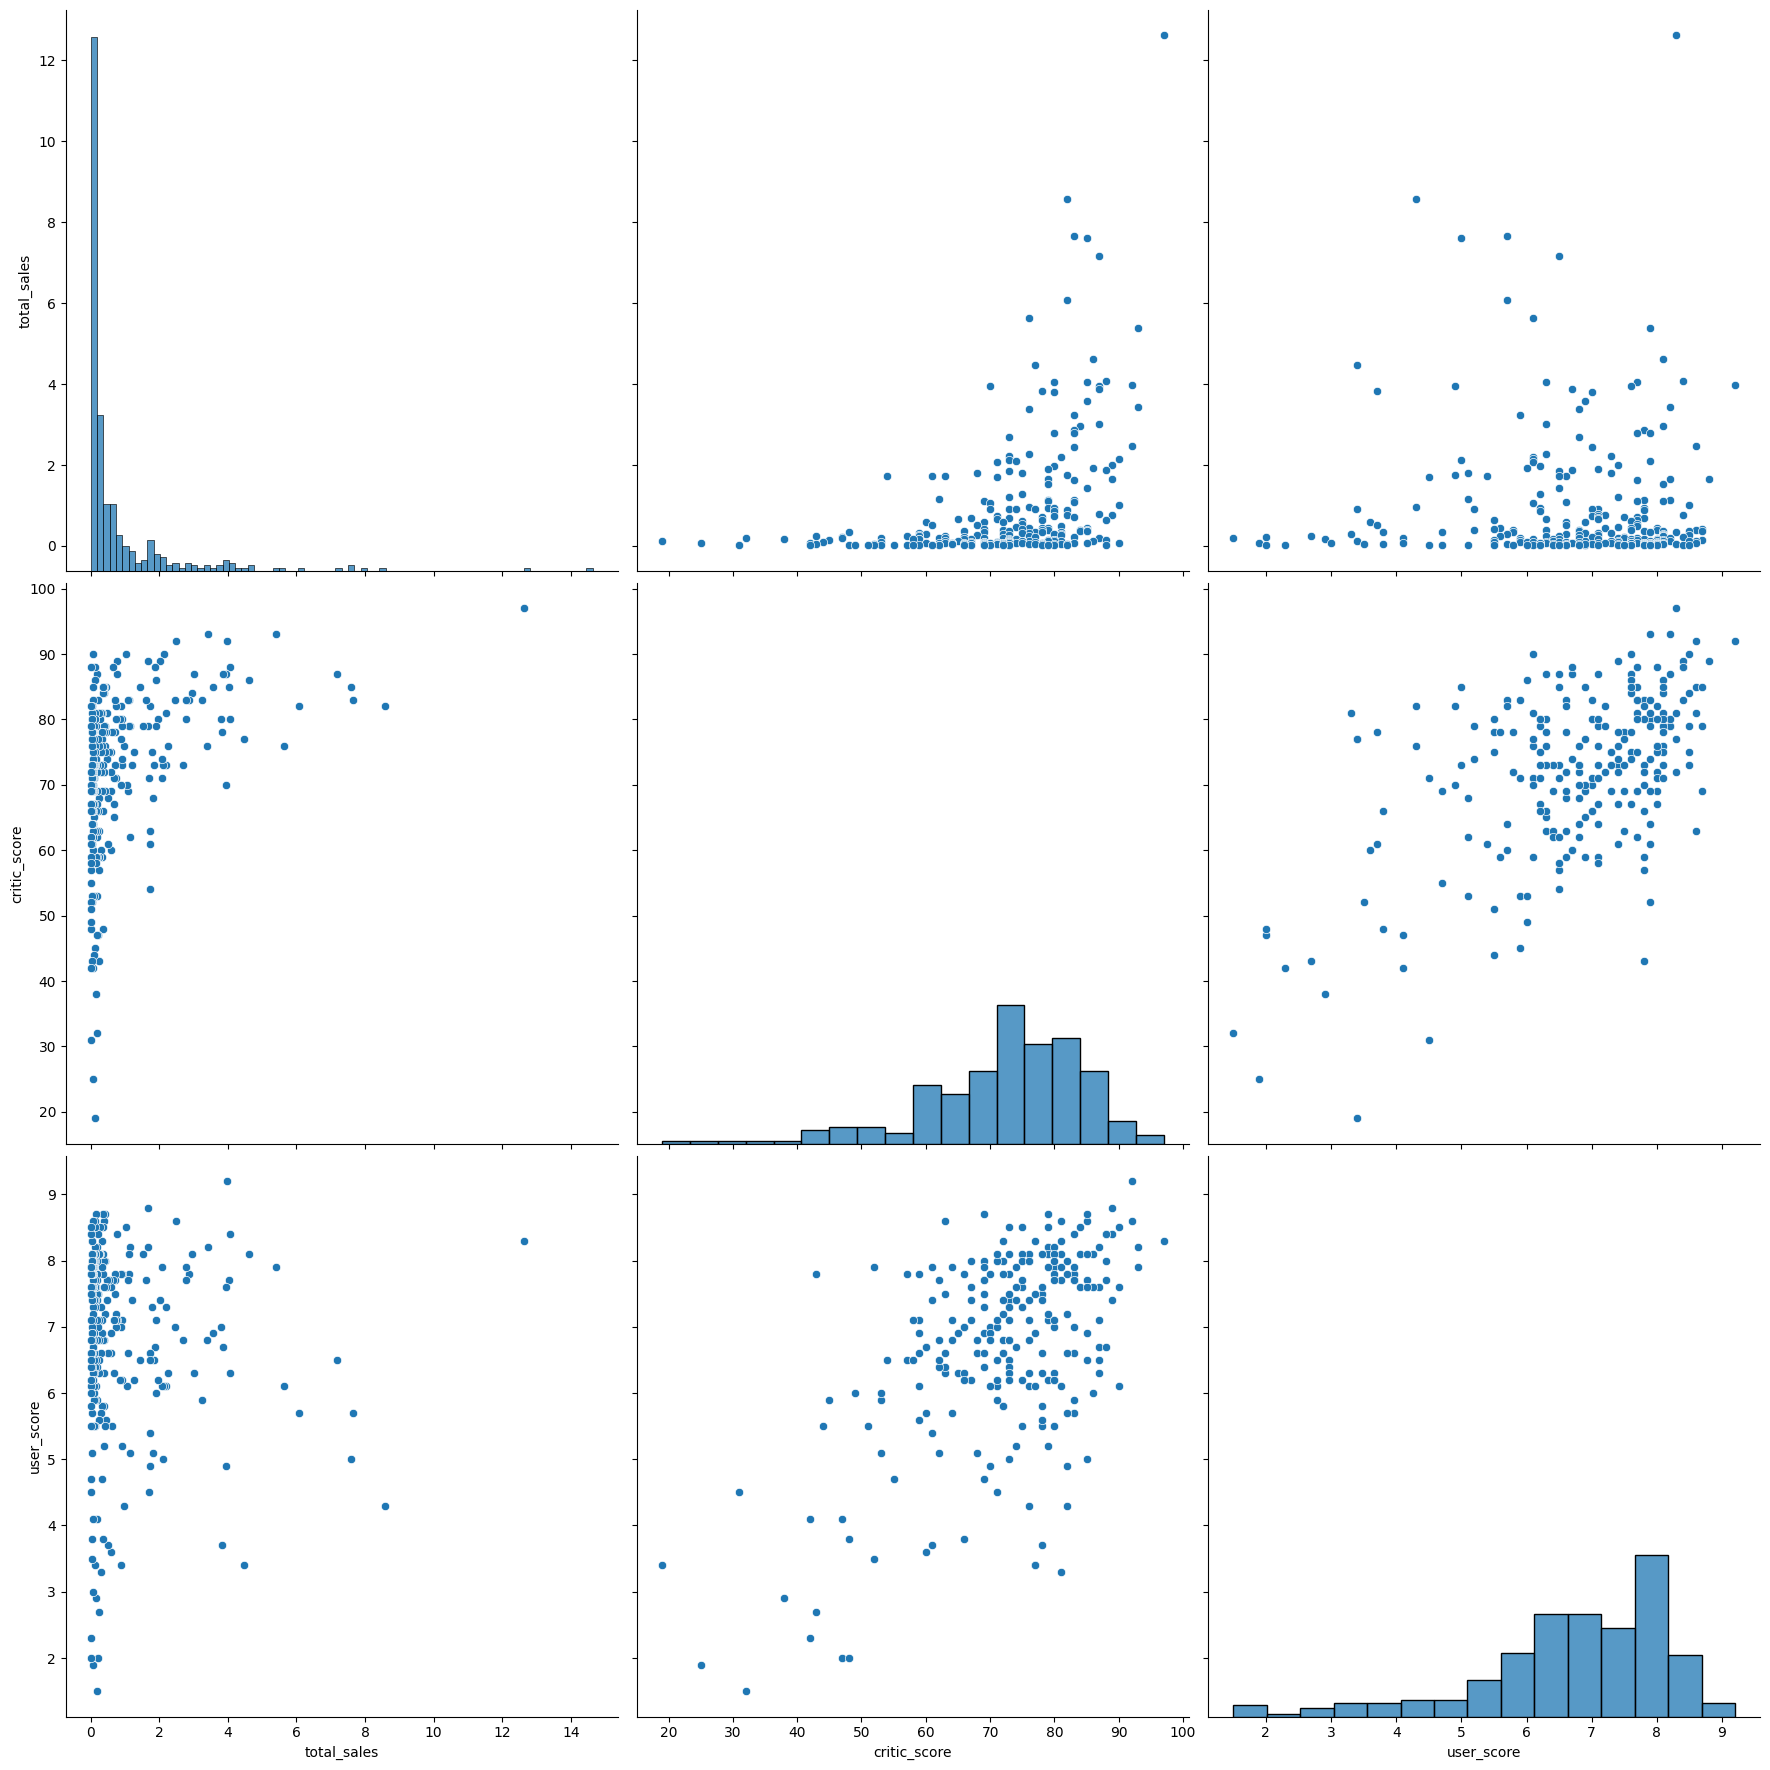

In [81]:
sns.pairplot(ps4_sales_crit_and_user, height=6)

plt.show()

**Вывод:**

Для оценки корреляции буду использовать следующие определения:
- корреляция от 0 до 0.1 (или -0.1) - отсутствует;
- корреляция от 0.1 (или -0.1) до 0.3 (или -0.3) - слабая;
- корреляция от 0.3 (или -0.3) до 0.5 (или -0.5) - умеренная;
- корреляция от 0.5 (или -0.5) до 0.7 (или -0.7) - высокая;
- корреляция от 0.7 (или -0.7) до 0.9 (или -0.9) - весьма высокая;
- корреляция от 0.9 (или -0.9) до 1 (или -1) - сильная.

На графике по **ps4** видим умеренную прямую корреляцию между прибылью и рейтингом критиков (0.41). Корреляция между продажами и оценками игроков отсутствует (-0.03).

Стоит отметить, что оценки критиков высоко влияют и на оценки пользователей (0.56).

### Соотнесем выводы с продажами игр на других платформах

Теперь рассмотрим корреляцию по оставшимся игровым платформам:

In [80]:
# для упрощения сделаем функцию:
def sales_crit_and_user_ratings(top_6_platforms, platforms):
    for platform in platforms:
        data = actual_period.query('platform == @platform')
        data = data.loc[:, ['total_sales', 'critic_score', 'user_score']]
        print('Рассмотрим', platform)
        print()
        sns.pairplot(data, height=6)
        plt.show()
        print(data.corr())
        print()
        print()
        print()

Рассмотрим xone



C:\Users\kiril\practicum\practicum_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


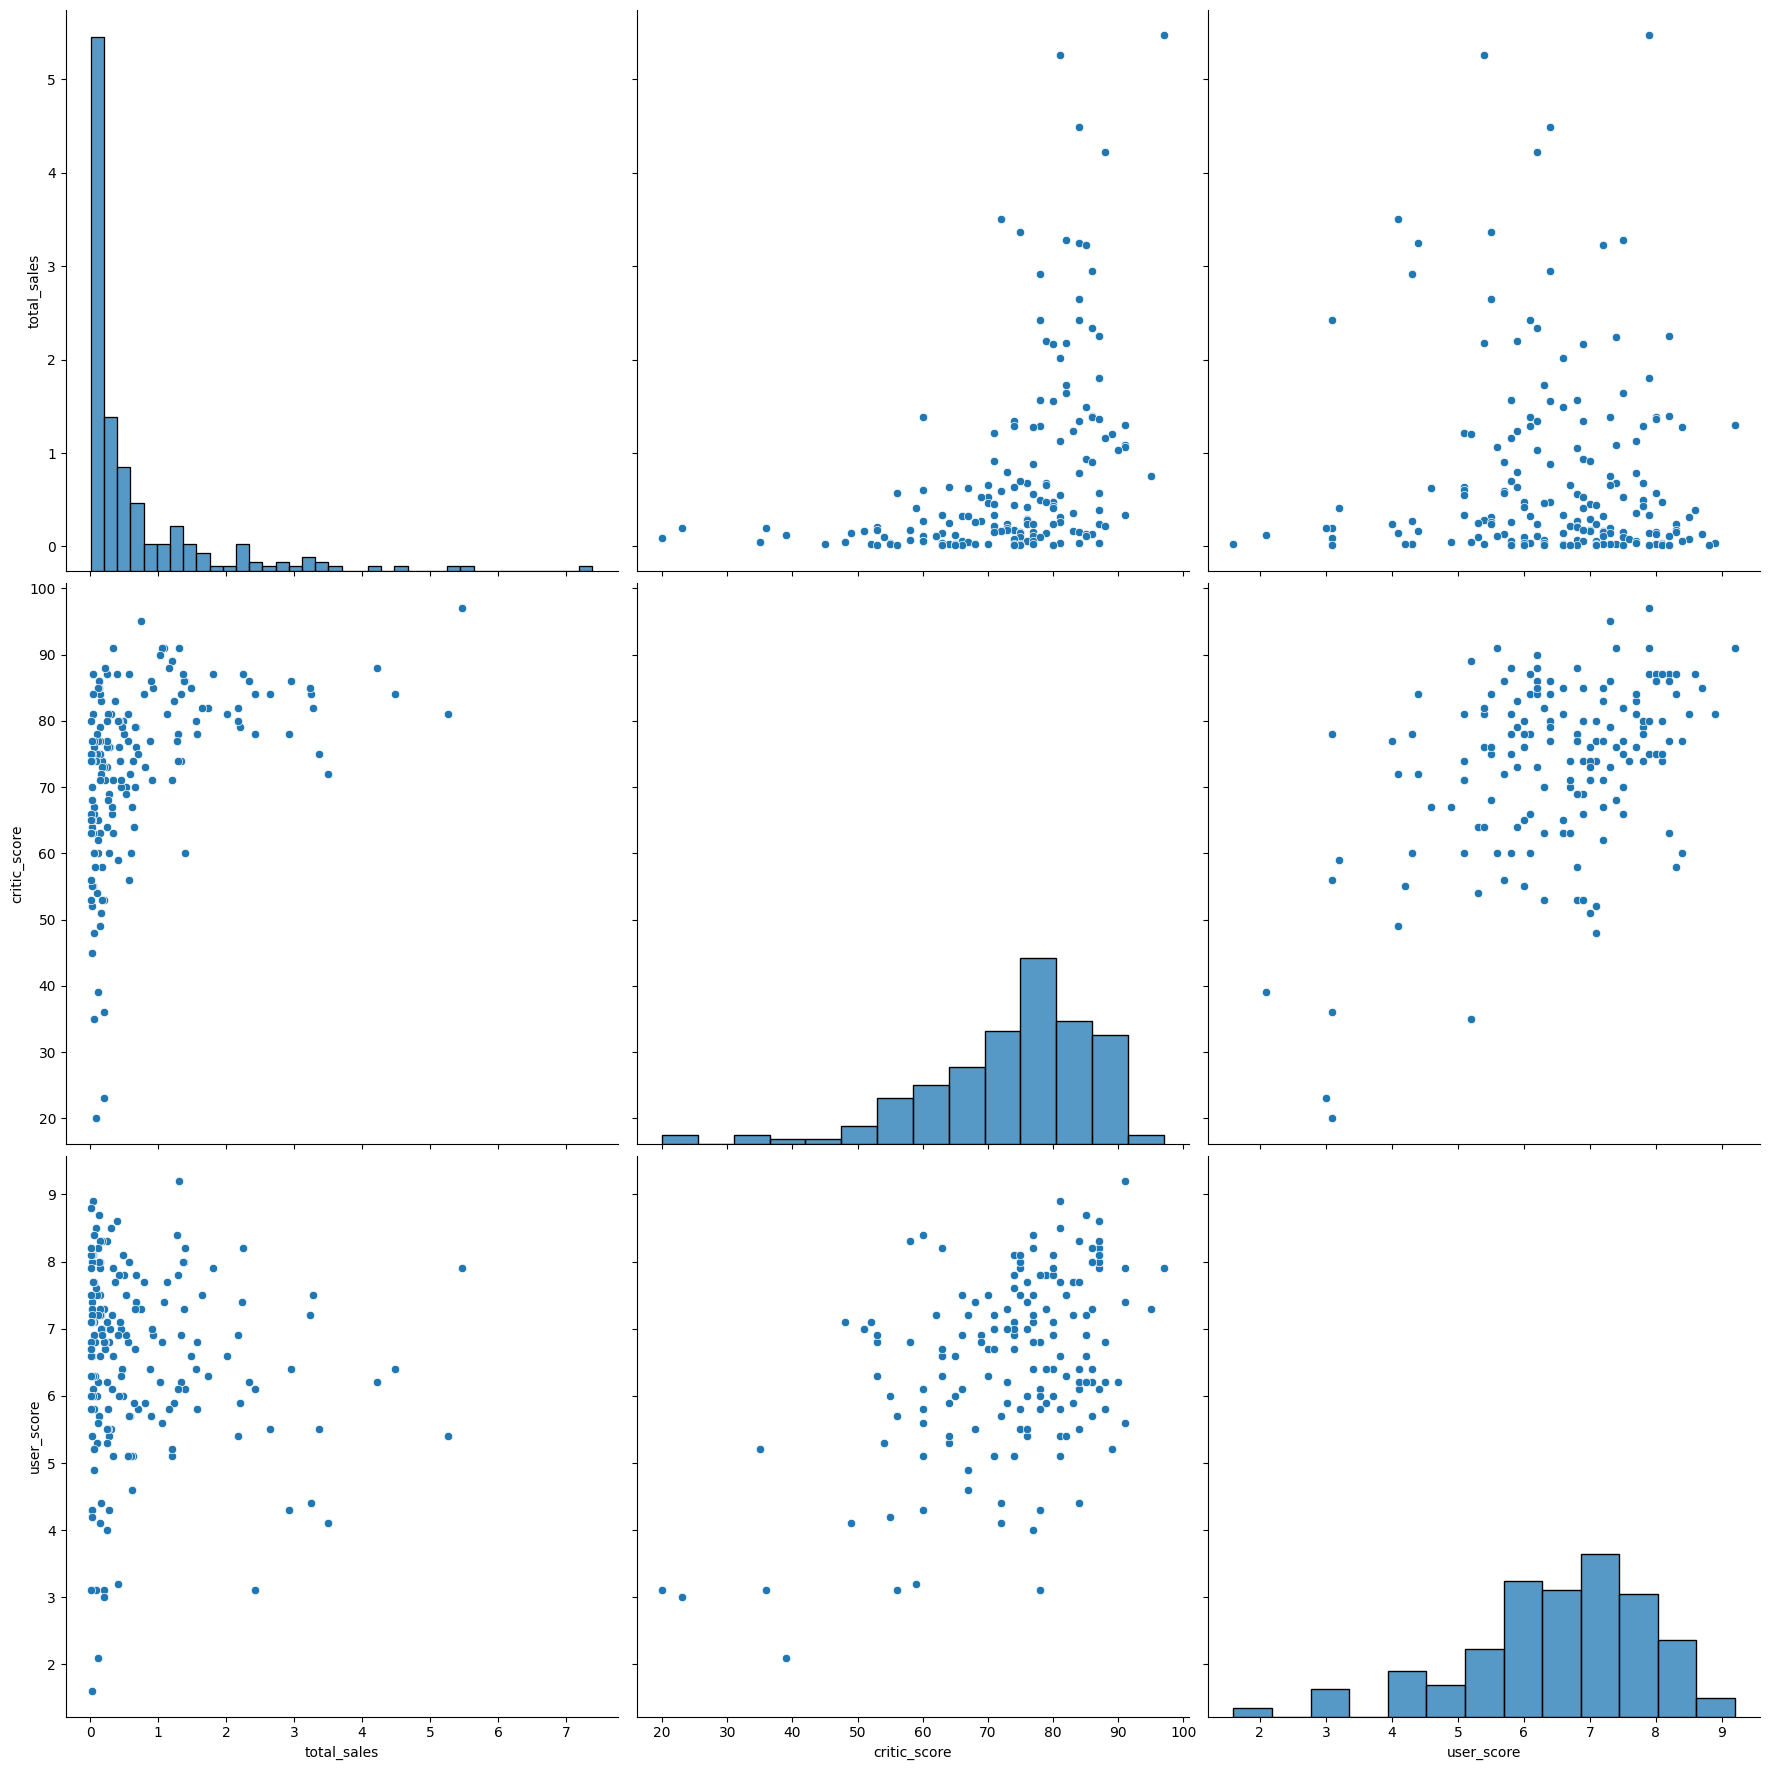

              total_sales  critic_score  user_score
total_sales      1.000000      0.416998   -0.068925
critic_score     0.416998      1.000000    0.472462
user_score      -0.068925      0.472462    1.000000



Рассмотрим pc



C:\Users\kiril\practicum\practicum_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


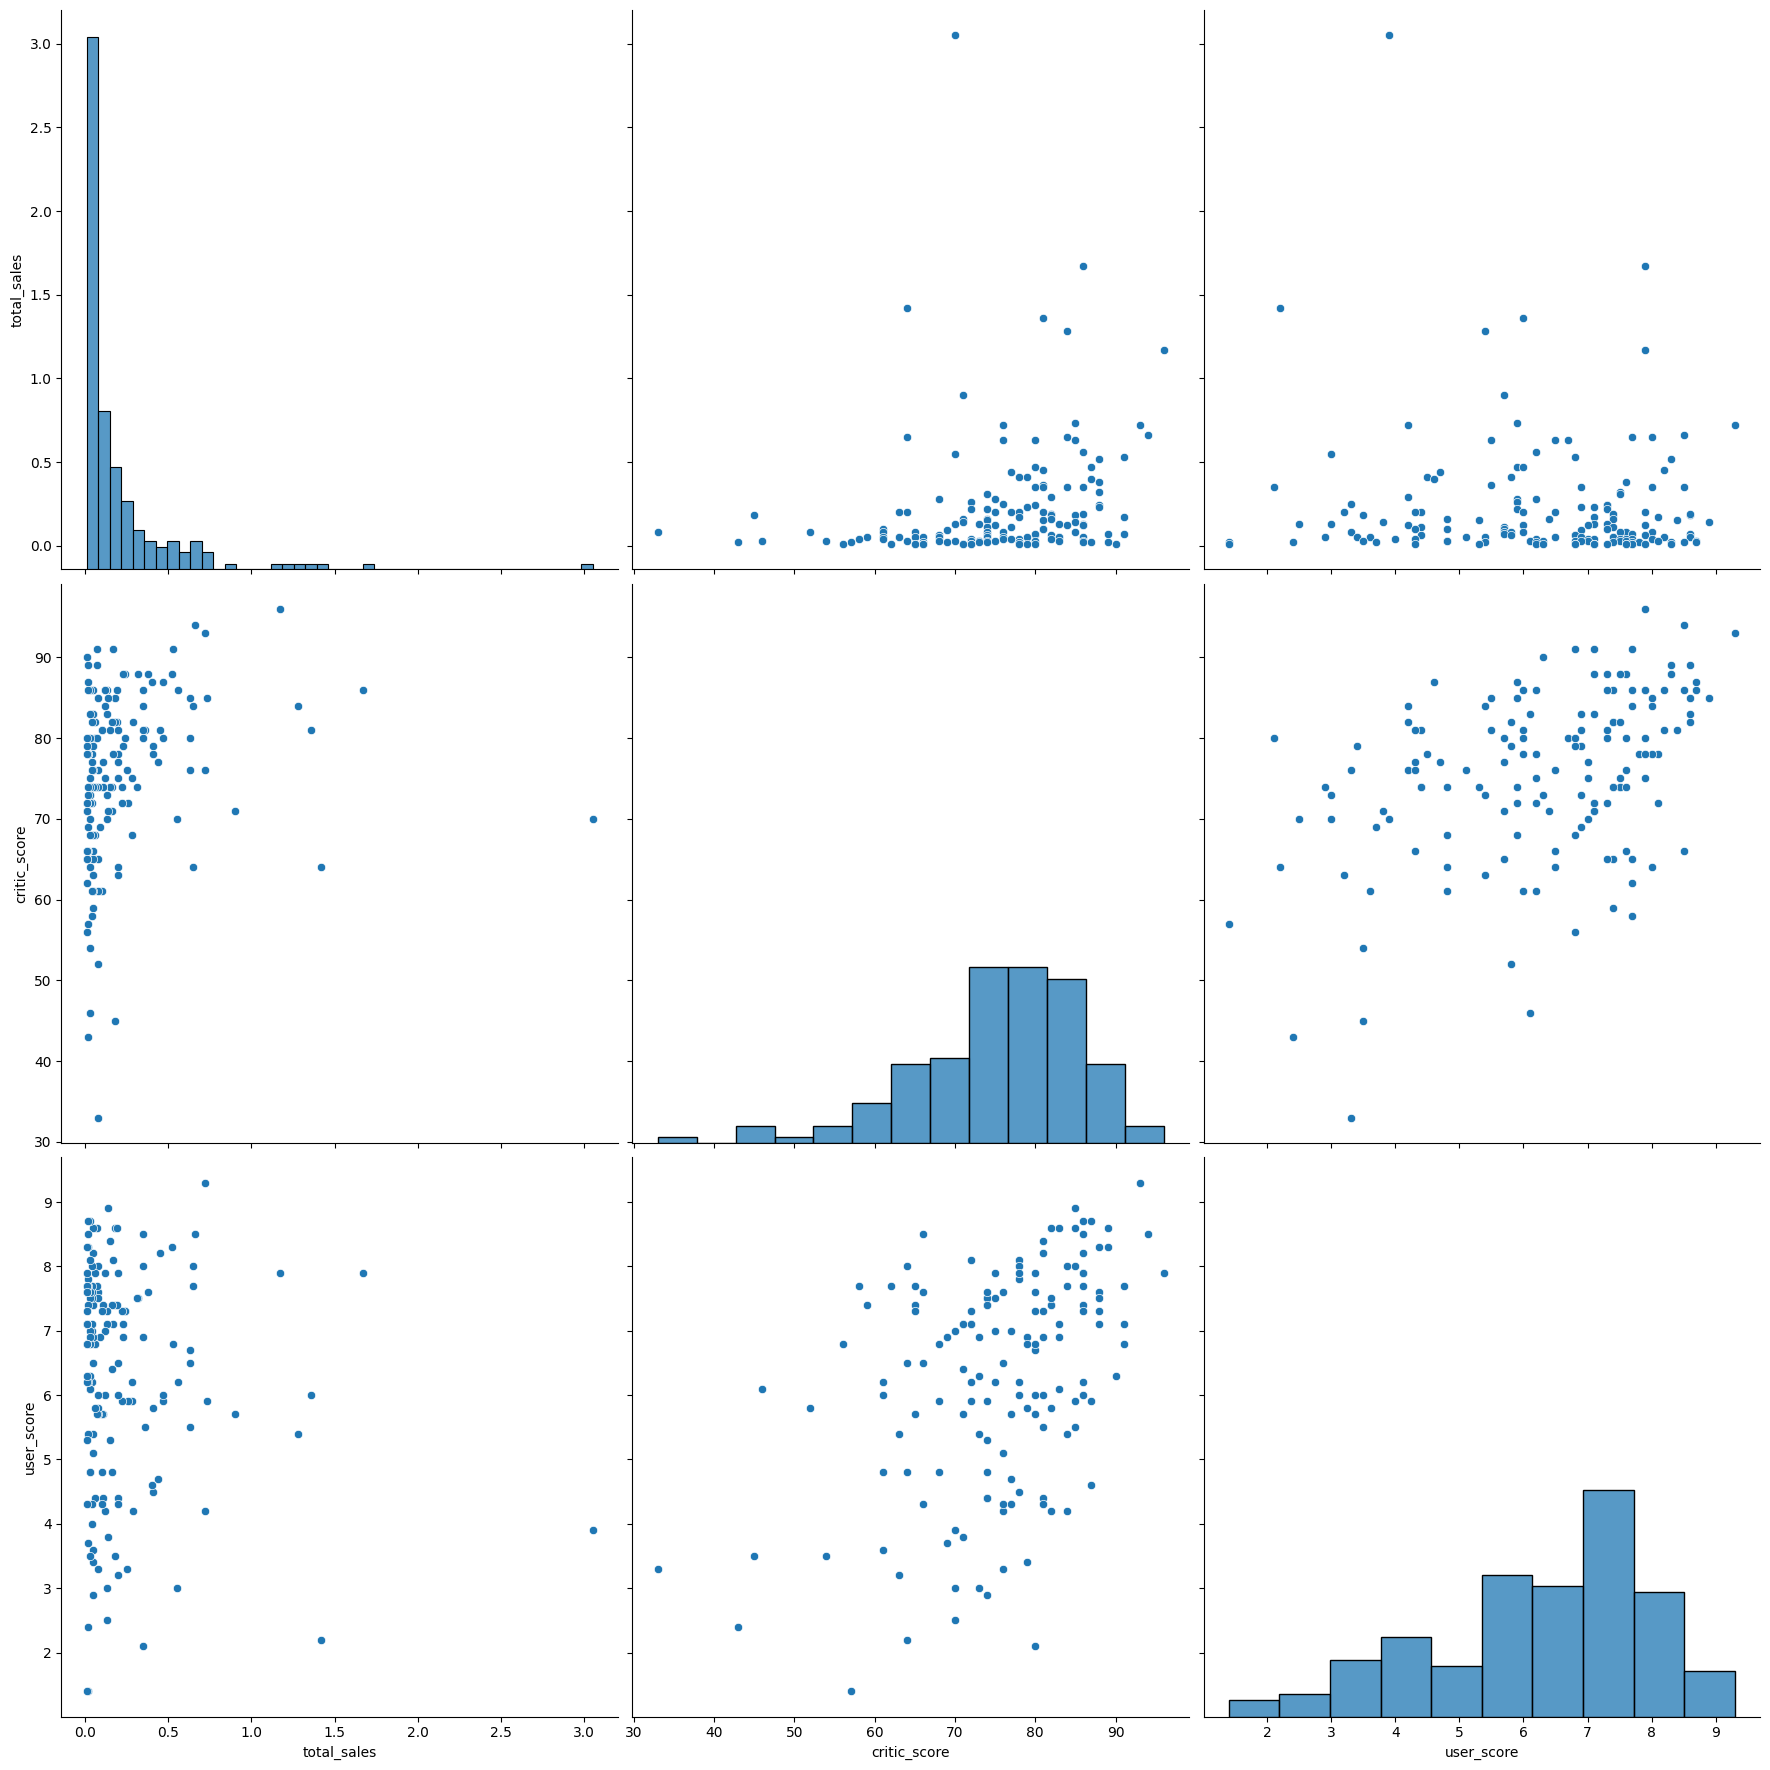

              total_sales  critic_score  user_score
total_sales      1.000000      0.199660   -0.089998
critic_score     0.199660      1.000000    0.432737
user_score      -0.089998      0.432737    1.000000



Рассмотрим wiiu



C:\Users\kiril\practicum\practicum_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


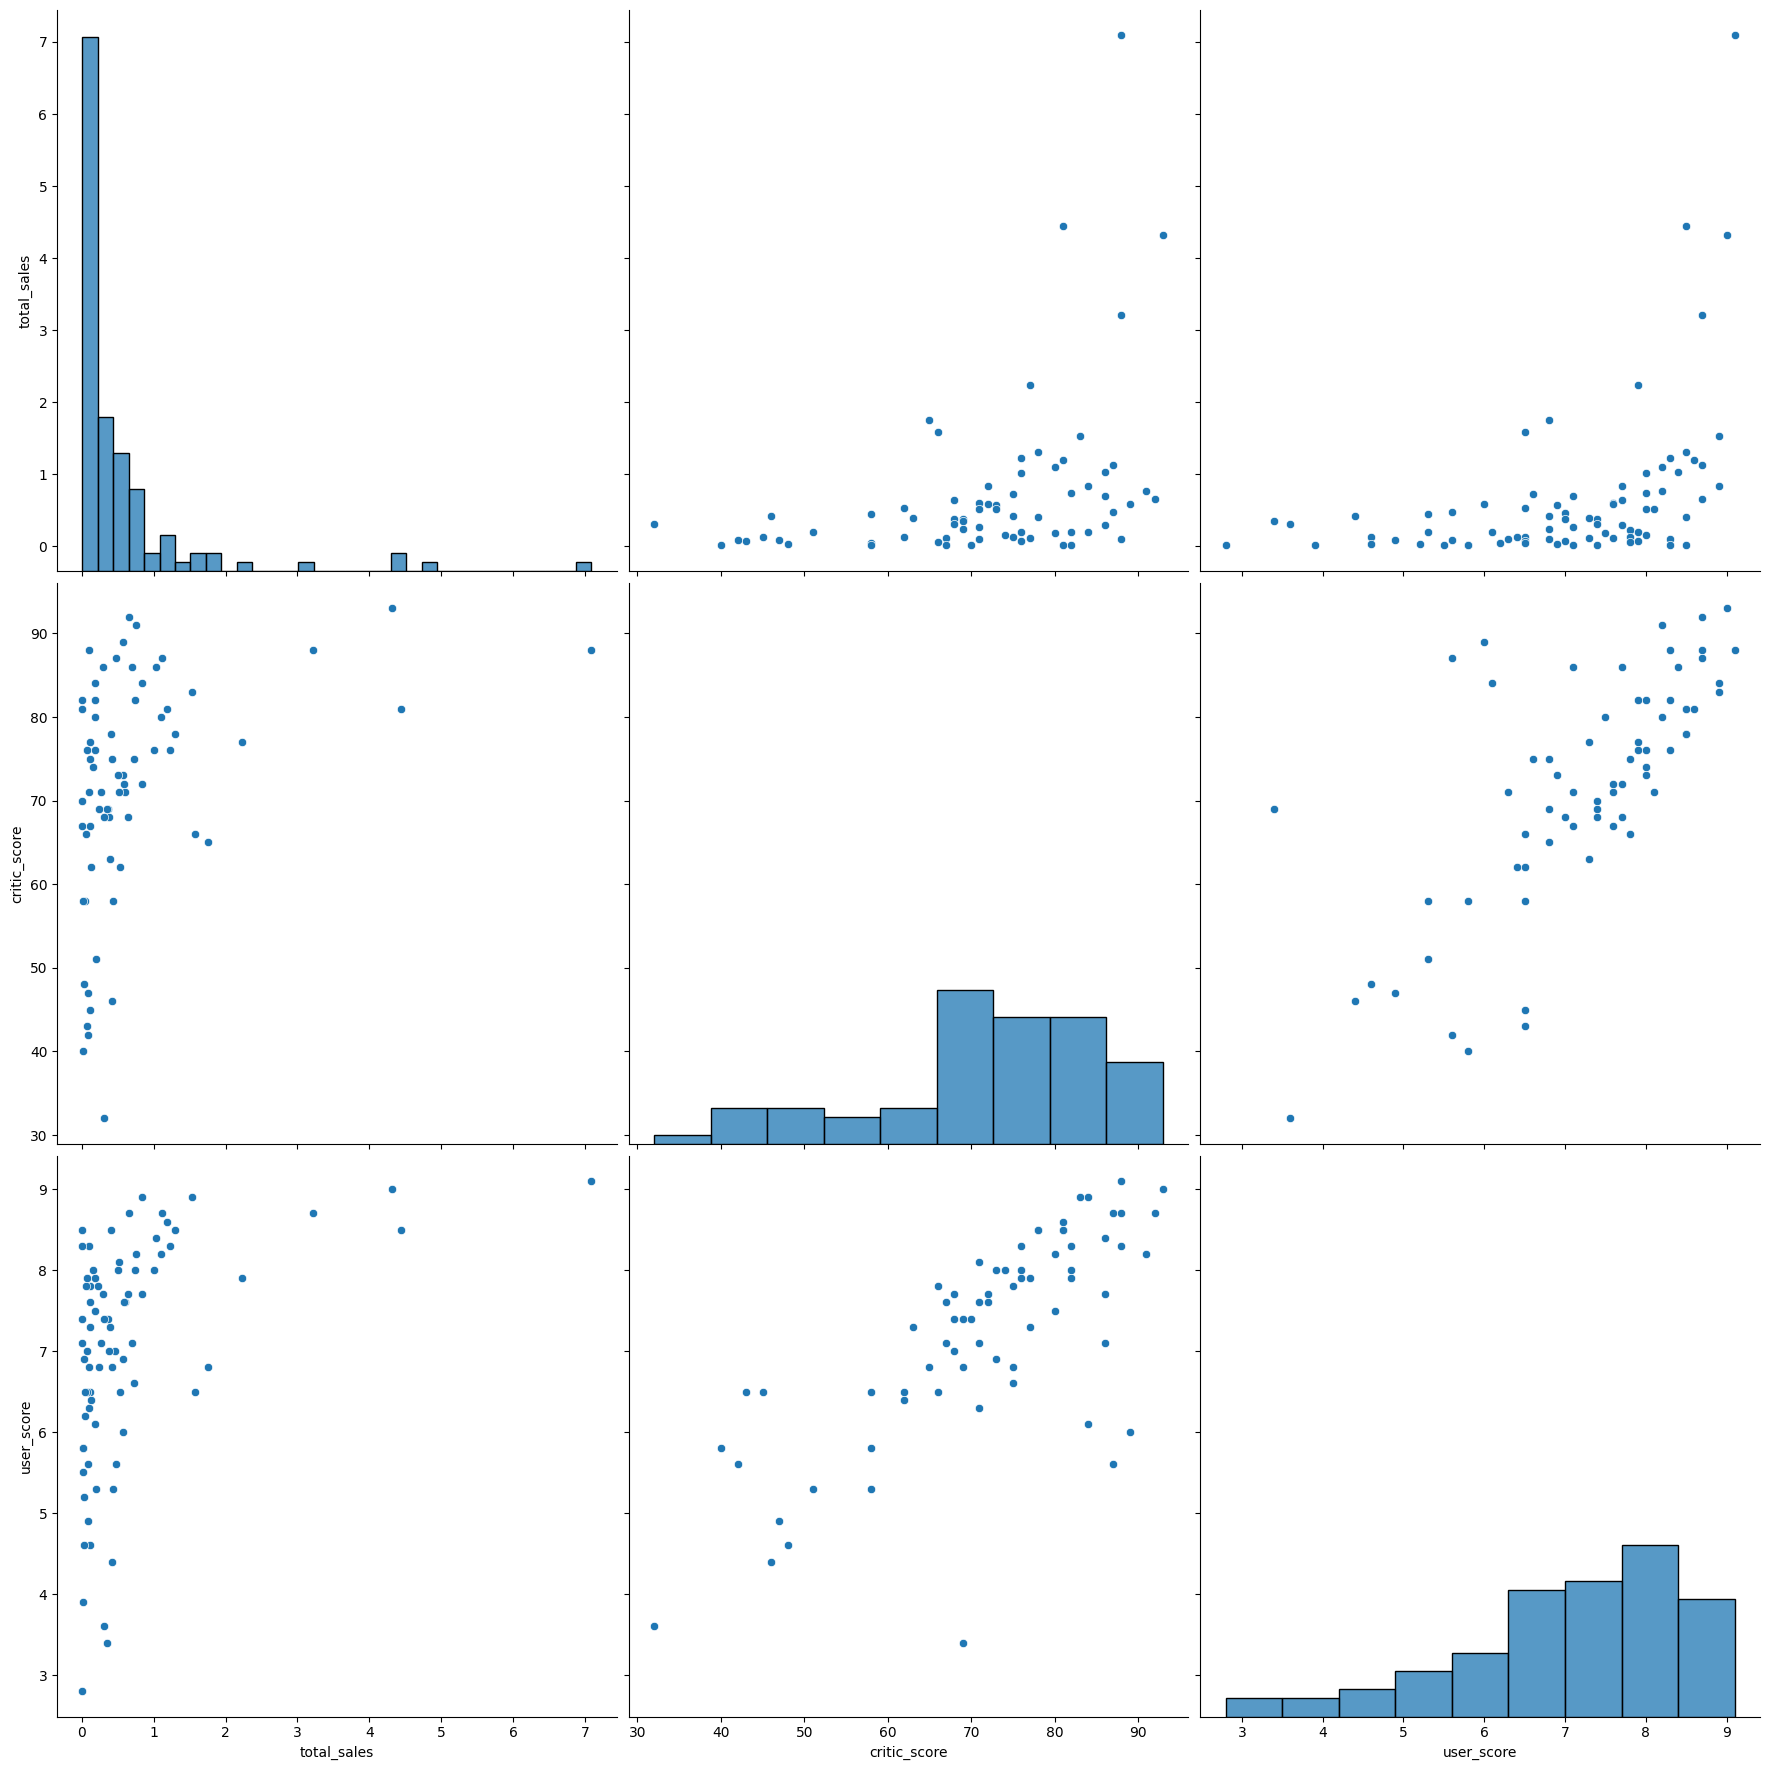

              total_sales  critic_score  user_score
total_sales      1.000000      0.376415    0.419330
critic_score     0.376415      1.000000    0.721313
user_score       0.419330      0.721313    1.000000



Рассмотрим 3ds



C:\Users\kiril\practicum\practicum_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


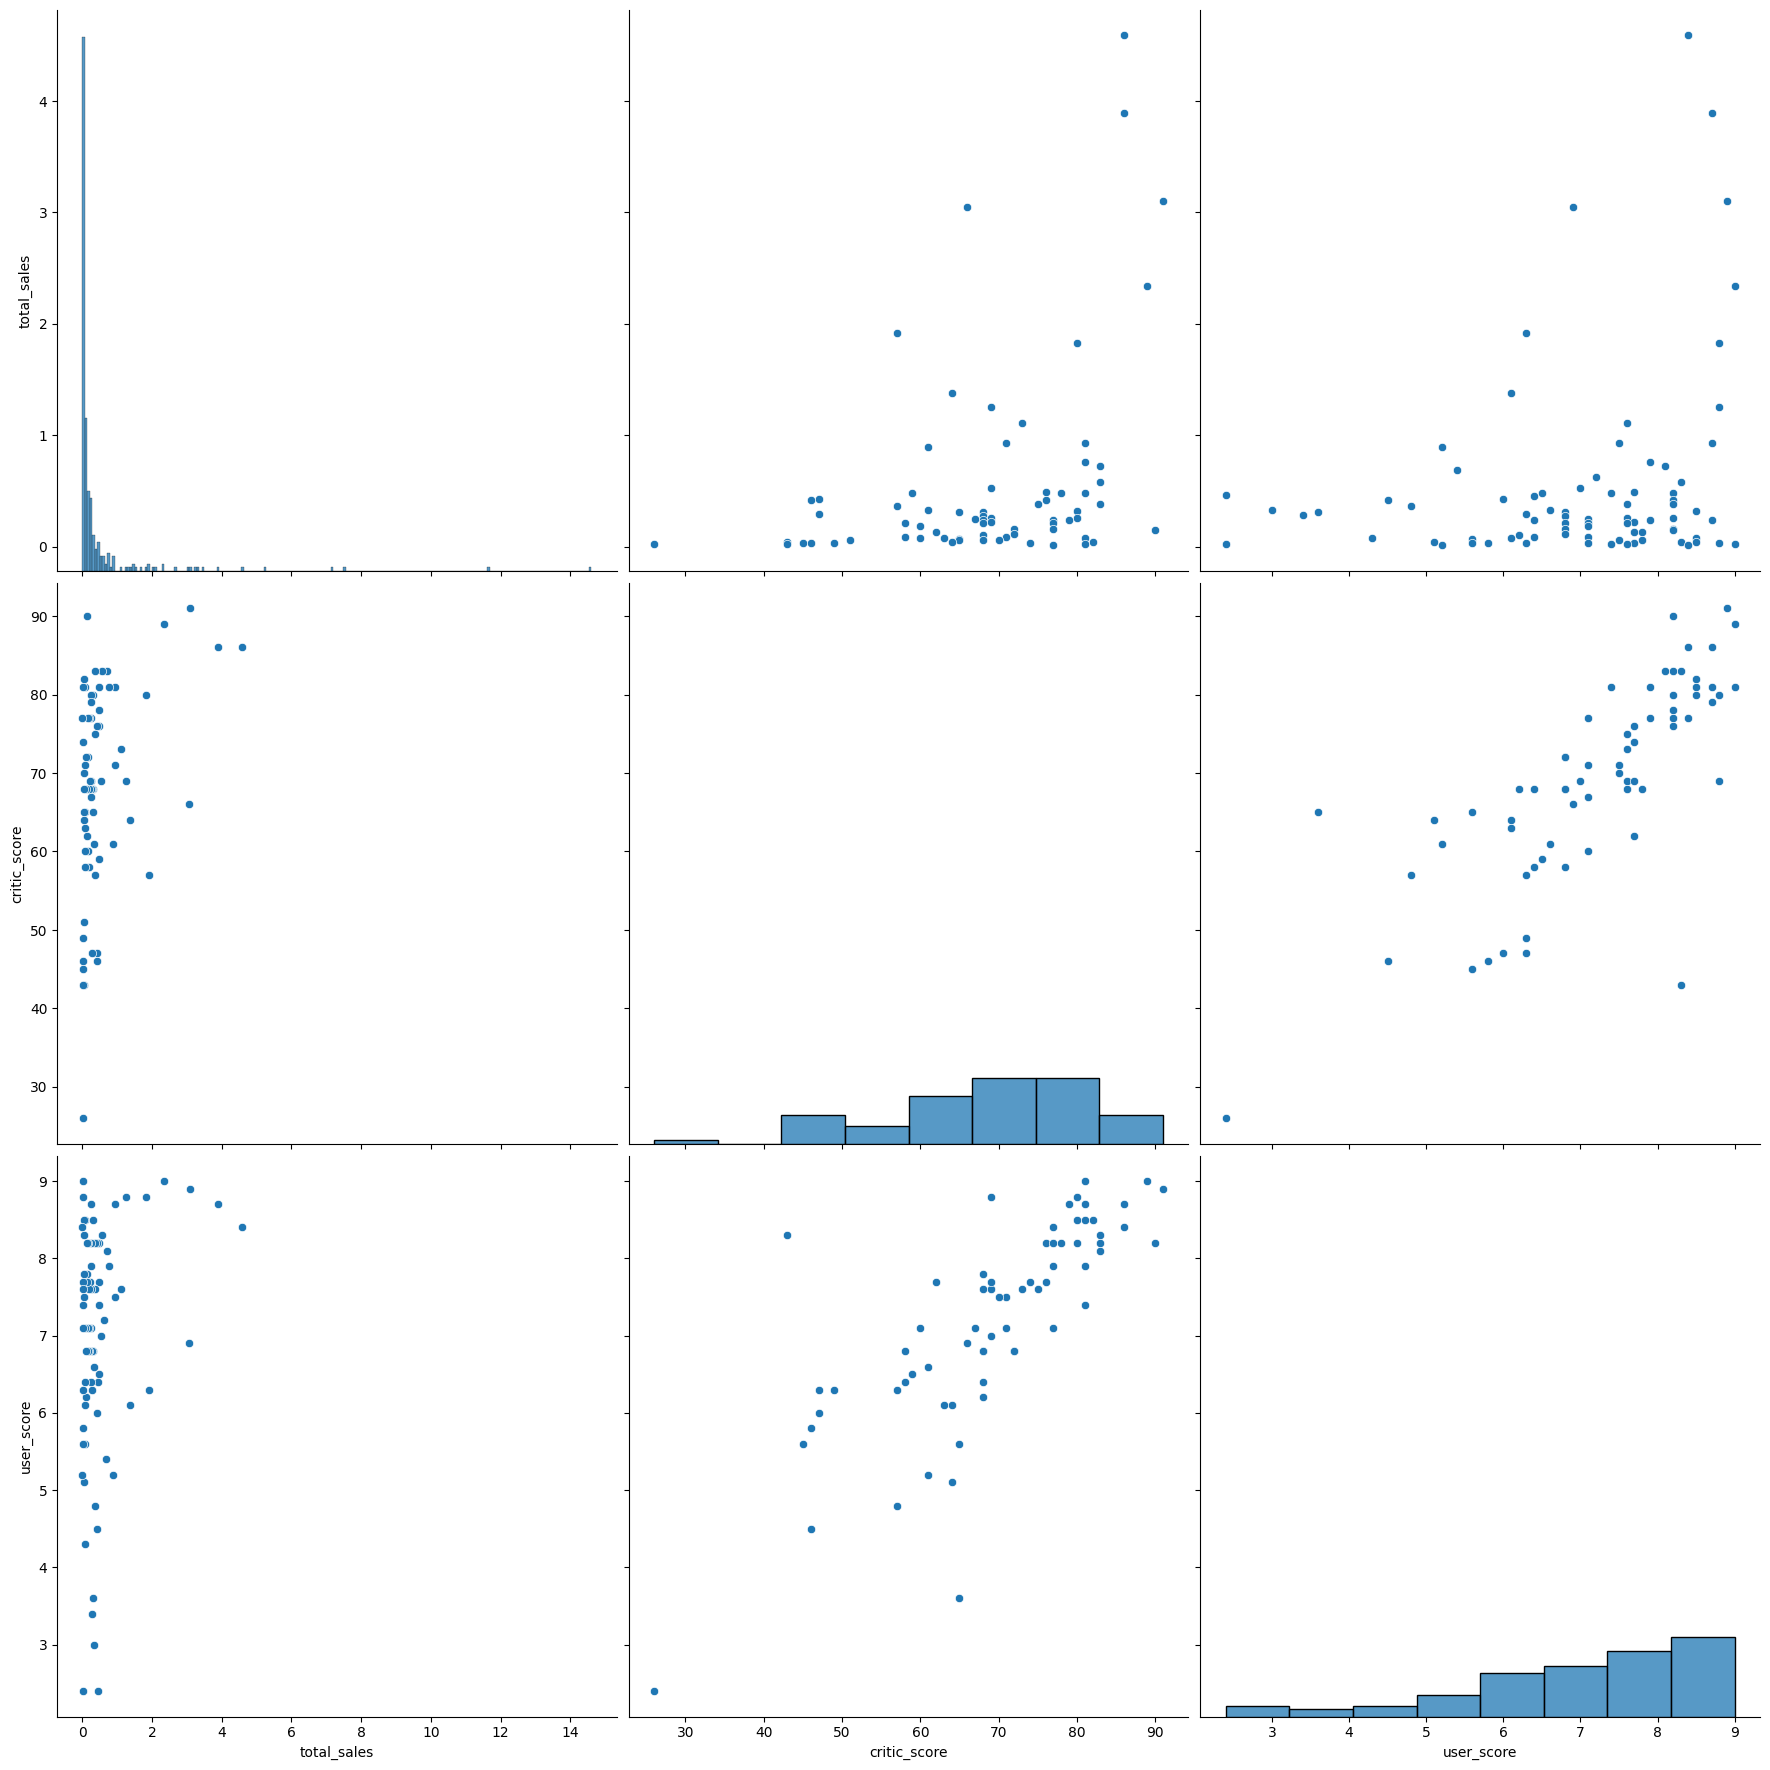

              total_sales  critic_score  user_score
total_sales      1.000000      0.357057    0.241504
critic_score     0.357057      1.000000    0.769536
user_score       0.241504      0.769536    1.000000



Рассмотрим psv



C:\Users\kiril\practicum\practicum_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


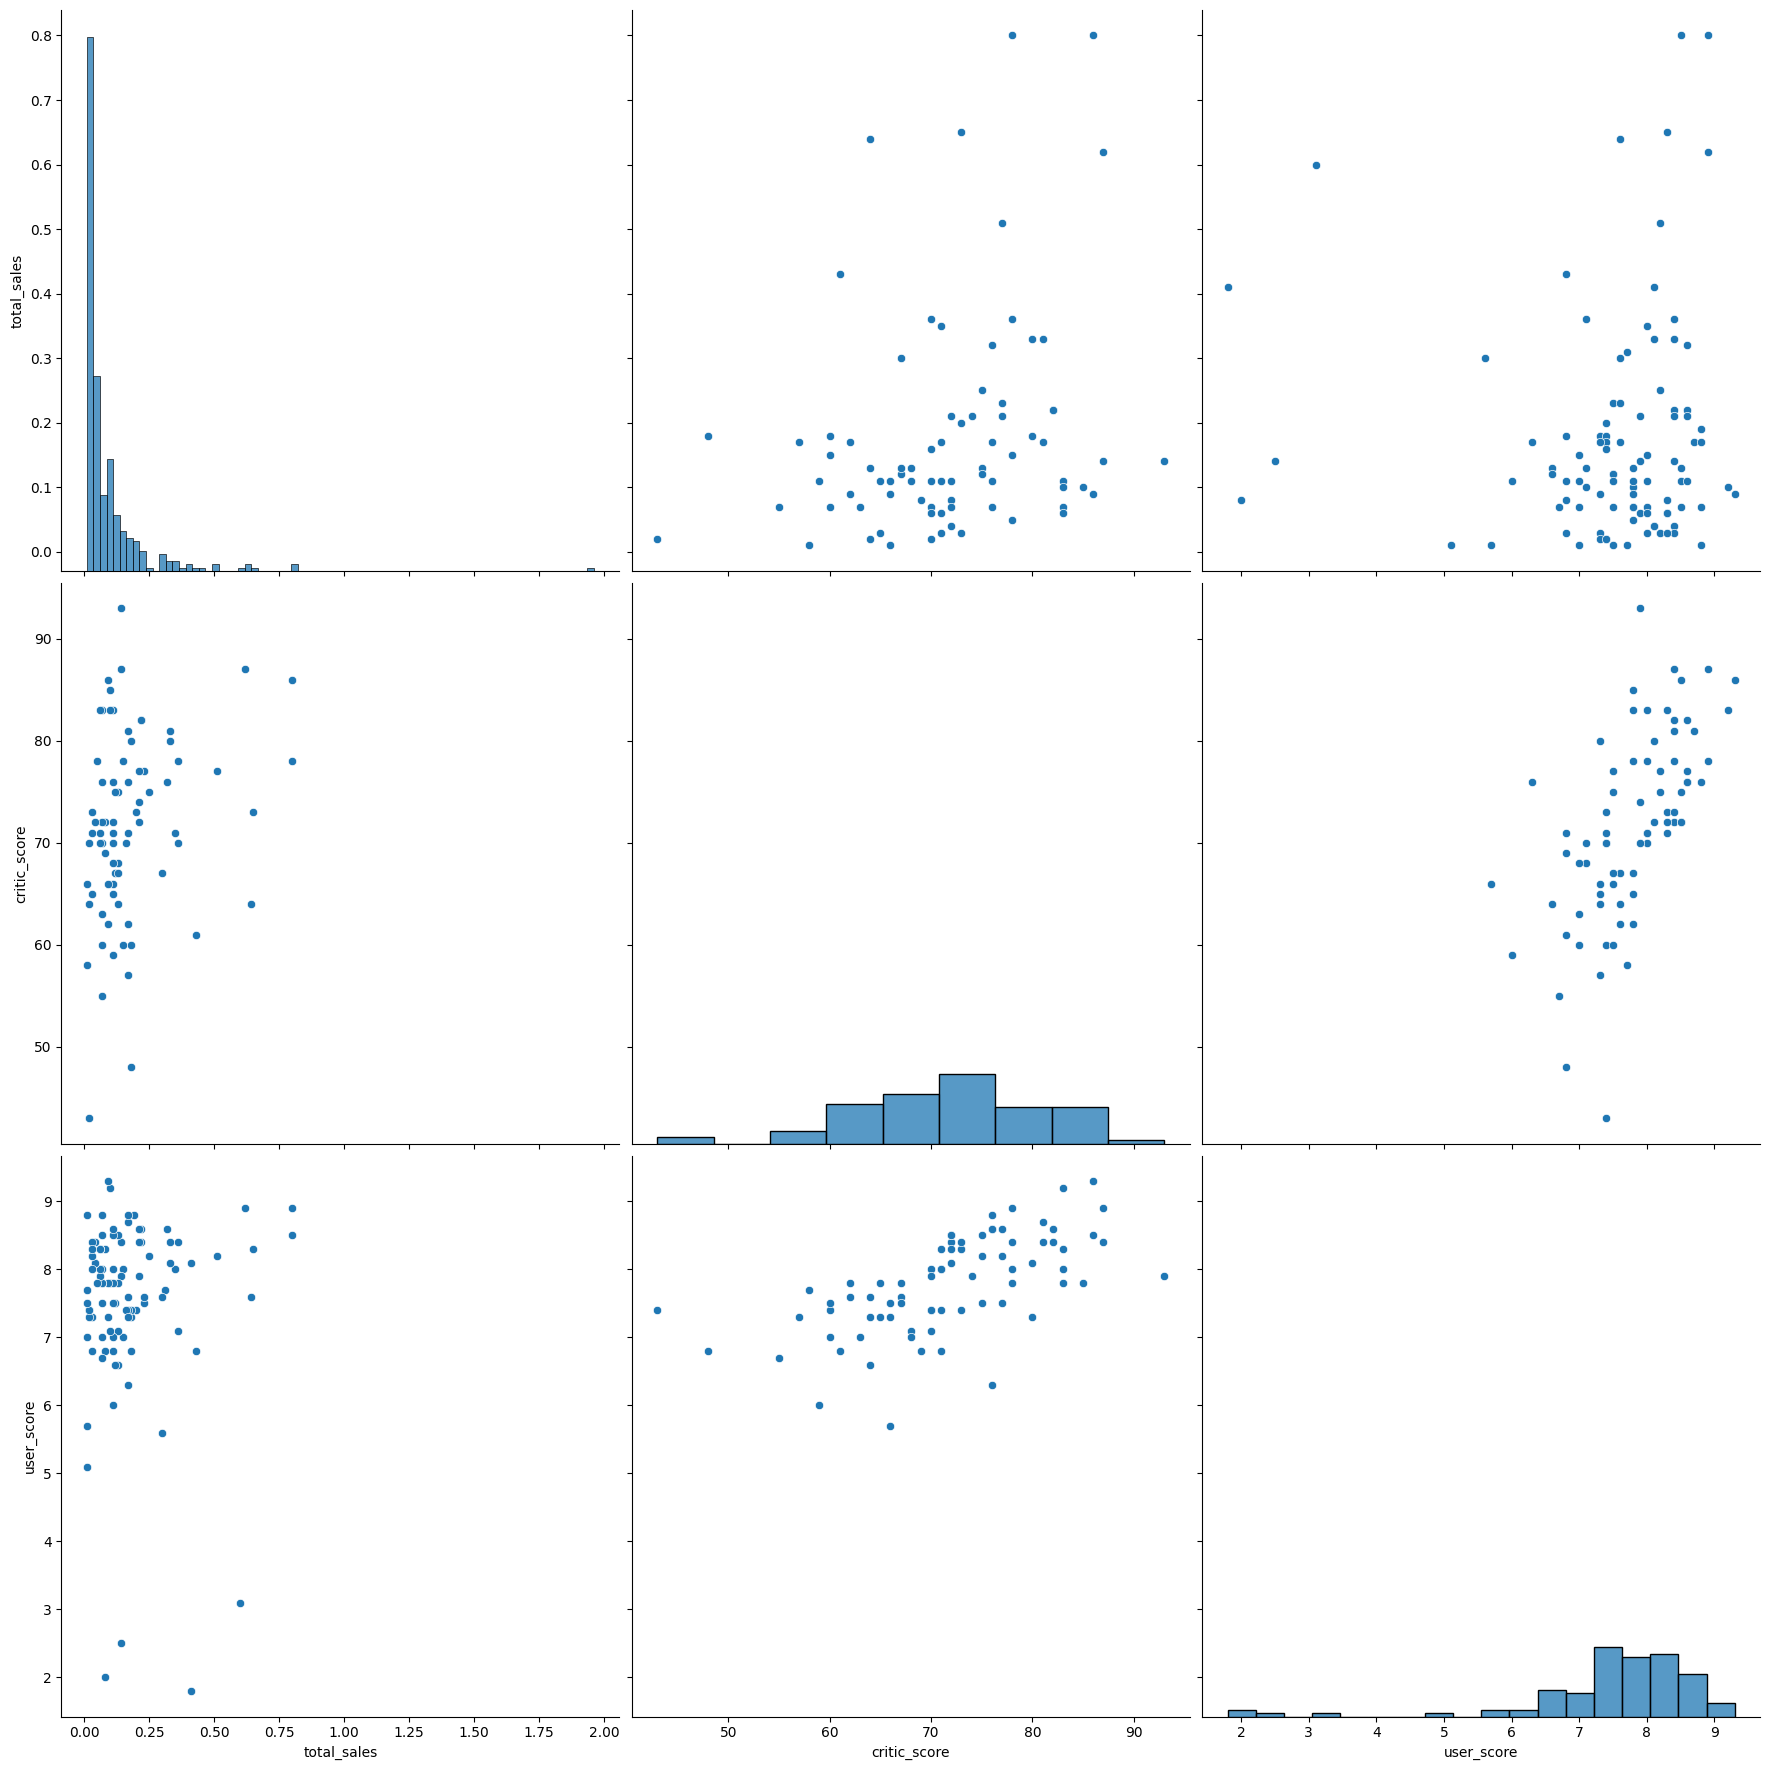

              total_sales  critic_score  user_score
total_sales      1.000000      0.254742    0.000942
critic_score     0.254742      1.000000    0.611521
user_score       0.000942      0.611521    1.000000





In [82]:
list_of_top_6_sans_ps4 = ['xone','pc','wiiu','3ds', 'psv']
sales_crit_and_user_ratings(top_6_platforms, list_of_top_6_sans_ps4)

**Вывод:**

Для оценки корреляции буду использовать следующие определения:
- корреляция от 0 до 0.1 (или -0.1) - отсутствует;
- корреляция от 0.1 (или -0.1) до 0.3 (или -0.3) - слабая;
- корреляция от 0.3 (или -0.3) до 0.5 (или -0.5) - умеренная;
- корреляция от 0.5 (или -0.5) до 0.7 (или -0.7) - высокая;
- корреляция от 0.7 (или -0.7) до 0.9 (или -0.9) - весьма высокая;
- корреляция от 0.9 (или -0.9) до 1 (или -1) - сильная.



**xone**: ситуация идентичка с **ps4**, оценки критиков имеют умеренную прямую корреляцию на продажи (0.42), в то время корреляция между продажами и оценками игроков отсутствует (-0.07). Корреляция оценок критиков и оценок игроков умеренная (0.47);


**pc**: оценки критиков имеют слабую прямую корреляцию с продажами (0.20). Корреляция между продажами и оценками игроков отсутствует (-0.09). Корреляция оценок критиков и оценок игроков умеренная (0.47);


**wiiu**: оценки критиков имеют умеренную прямую корреляцию с продажами (0.38). Корреляция между продажами и оценками игроков также умеренная, но немного выше чем у критиков (0.42). Корреляция оценок критиков и оценок игроков весьма высокая (0.72);


**3ds**: оценки критиков имеют умеренную прямую корреляцию с продажами (0.36). Корреляция между продажами и оценками игроков умеренная (0.24). Корреляция оценок критиков и оценок игроков весьма высокая (0.77);


**psv**: оценки критиков имеют слабую прямую корреляцию с продажами (0.25). Корреляция между продажами и оценками игроков отсутствует (0.0009). Корреляция оценок критиков и оценок игроков высокая (0.61).
    
В общем плане выделяется **wiiu**, у которой корреляция продаж от оценок игроков немного выше, чем от оценок критиков. Продажи **pc** и **psv** напротив слабо зависят от оценок критиков и пользователей. Стоит также отметить, что оценки критиков и игроков имеют весьма высокую корреляцию у **wiiu** и **3ds**.

### Посмотрим на общее распределение игр по жанрам.

In [64]:
genre_piv_t = top_6_platforms.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median']).reset_index()
genre_piv_t.columns = ['genre', 'total_sum', 'total_mean', 'total_median']
genre_piv_t = genre_piv_t.sort_values(by='total_sum', ascending=False).reset_index(drop=True)
genre_piv_t

,genre,total_sum,total_mean,total_median
0,action,199.81,0.349930,0.090
1,shooter,165.71,1.358279,0.515
2,role-playing,123.94,0.543596,0.120
3,sports,90.67,0.713937,0.230
4,misc,34.66,0.309464,0.105
5,platform,34.22,0.622182,0.240
6,racing,30.36,0.506000,0.100
7,fighting,26.69,0.556042,0.120
8,simulation,19.81,0.396200,0.090
9,adventure,16.48,0.097515,0.030


Выведем в виде графиков для наглядности:

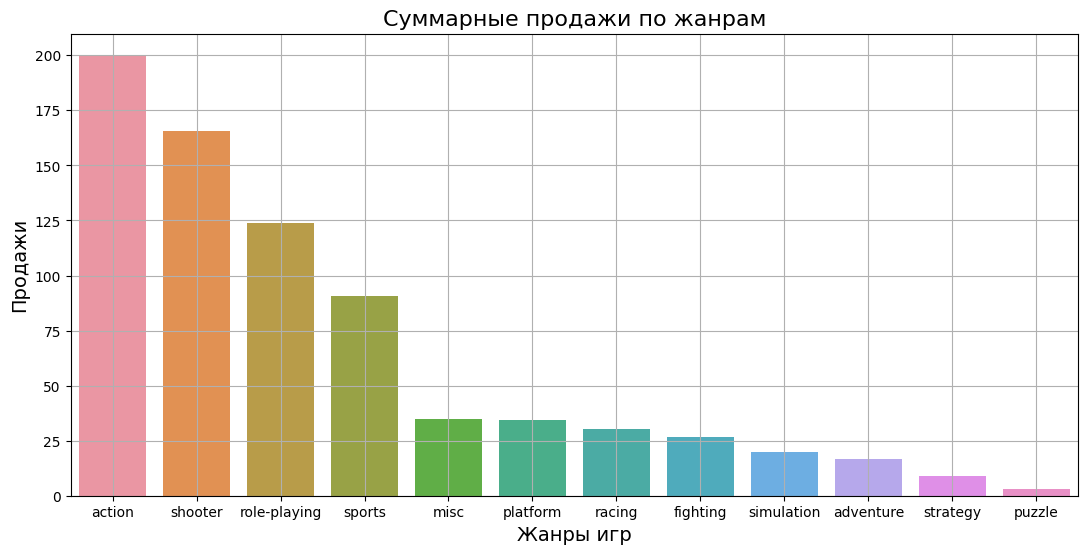

In [65]:
sns.barplot(data=genre_piv_t, x='genre', y='total_sum')

plt.title('Суммарные продажи по жанрам',fontsize=16)
plt.xlabel('Жанры игр',fontsize=14)
plt.ylabel('Продажи',fontsize=14)
plt.grid(True)

plt.show()

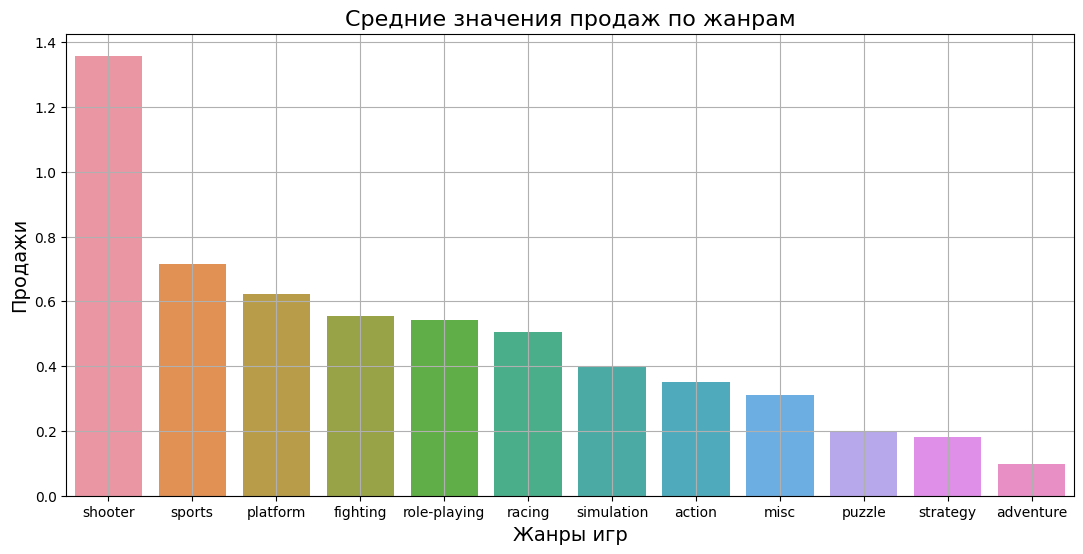

In [66]:
genre_piv_t = genre_piv_t.sort_values(by='total_mean', ascending=False).reset_index(drop=True)
sns.barplot(data=genre_piv_t, x='genre', y='total_mean')

plt.title('Средние значения продаж по жанрам',fontsize=16)
plt.xlabel('Жанры игр',fontsize=14)
plt.ylabel('Продажи',fontsize=14)
plt.grid(True)

plt.show()

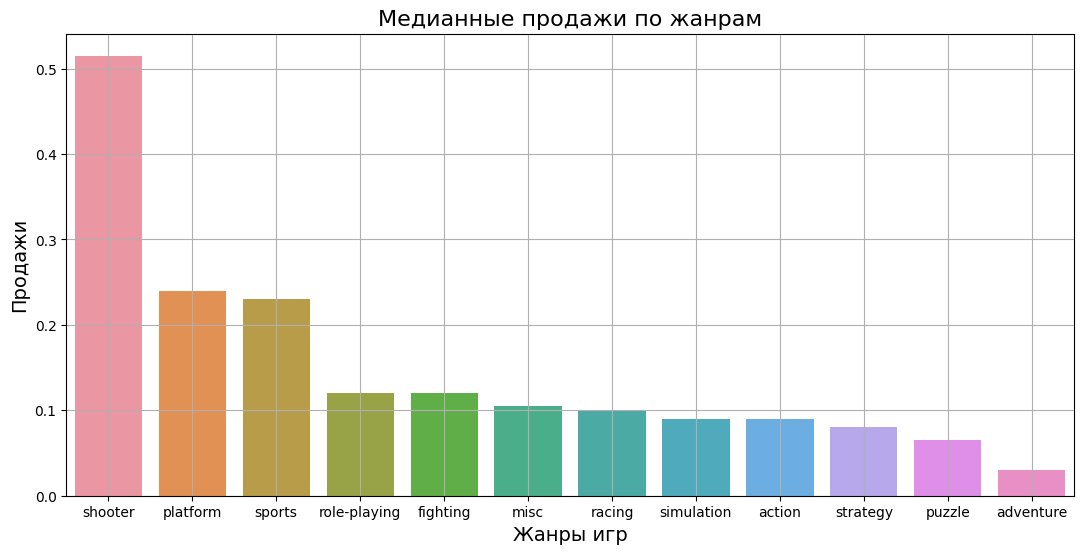

In [67]:
genre_piv_t = genre_piv_t.sort_values(by='total_median', ascending=False).reset_index(drop=True)
sns.barplot(data=genre_piv_t, x='genre', y='total_median')

plt.title('Медианные продажи по жанрам',fontsize=16)
plt.xlabel('Жанры игр',fontsize=14)
plt.ylabel('Продажи',fontsize=14)
plt.grid(True)

plt.show()

**Вывод:** 
- лидером по суммарным продажам считается жанр **Action**, но по другим графикам мы видим, что данный жанр очень зависим от бестселлеров;
- жанр **Shooter** показывает себя более стабильно. В нем так же есть бестселлеры, что позволяет ему удерживаться на 2-м месте по суммарным продажам. Но по средним и медианным значениям он обходит близжайших конкурентов почти в 2 раза;
- **Platform** и **Sports** удерживают 2-е и 3-е места по медианным продажам. Они смогут принести более стабильных доход.
- тройку аутсайдеров по всем показателям удерживают **Strategy**, **Puzzle** и **Adventure**.

**Вывод по исследовательскому анализу:**
1. Количество игр на разные платформы начало расти с большой скоростью с 90х годов до 2008 года. После кризиса 2008 года многие игровые студии закрылись, некоторые переориентировались на мобильные приложения и игры, что сказалось на общем объеме;
2. Самые популярные игровые платформы за весь период : **Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation**;
3. Средний период 'жизни' платформы длится 8-12 лет. Пик продаж наступает через 4-6 лет после выхода платформы;
4. Из лидеров продаж только **Xbox 360**, **Sony Playstation 3** и **Nintendo Wii** имеют продажи в 2016 году, остальные платформы себя изжили;
5. В качестве актуального периода для дальнейшего анализа взяли 2013-2016 года;
6. Топ платформ по миру: **Sony Playstation 4**, **Sony Playstation 3**, **Xbox ONE**, **Xbox 360**, **Personal Computer** и **Nintendo 3DS** за актуальный период. Платформы выбирались на основе успехов их предшественников;
6. Разница в продажах отличается. Имеются хиты, которые продаются годами и дают много прибыли, таковых единицы. И много игр, которые не смогли преодолеть порог в 400 тыс. долларов за актуальный период с 2013 по 2016;
7. У анализируемых нами платформ (**Sony Playstation 4**, **Xbox ONE**, **Personal Computer**, **Nintendo Wii U**, **Nintendo 3DS** и **PlayStation Vita**) наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли;
8. Самыми прибыльными жанрами можно считать **Shooter**, **Platform** и **Sports**. Жанр **Action** очень зависит от бестселлеров. **Strategy**, **Puzzle** и **Adventure** замыкают рейтинг.

Можно сказать, что на 2017 год ожидается подъем продаж на платформах выбранного топа: **Sony Playstation 4**, **Xbox ONE**, **Personal Computer**, **Nintendo Wii U**, **Nintendo 3DS** и **PlayStation Vita**.

## Составим портрет пользователя каждого региона (NA, EU, JP)

Для составления графиков по каждому региону нам понадобиться функция:

In [68]:
def top_in_regions_plot(groupby):
    na_region = actual_period.groupby(groupby).agg({'na_sales': 'sum'})\
    .sort_values(by='na_sales', ascending=False).reset_index().rename_axis(None, axis=1)[:5]
    eu_region = actual_period.groupby(groupby).agg({'eu_sales': 'sum'})\
    .sort_values(by='eu_sales', ascending=False).reset_index().rename_axis(None, axis=1)[:5]
    jp_region = actual_period.groupby(groupby).agg({'jp_sales': 'sum'})\
    .sort_values(by='jp_sales', ascending=False).reset_index().rename_axis(None, axis=1)[:5]
    
    fig, ax = plt.subplots(1, 3, figsize=(25,6))
    
    sns.barplot(data=na_region, x=groupby,y='na_sales', ax=ax[0]).set_xticklabels(sns.barplot(data=na_region, x=groupby,y='na_sales', ax=ax[0]).get_xmajorticklabels(), fontsize = 16)
    sns.barplot(data=eu_region, x=groupby,y='eu_sales', ax=ax[1]).set_xticklabels(sns.barplot(data=eu_region, x=groupby,y='eu_sales', ax=ax[1]).get_xmajorticklabels(), fontsize = 16)
    sns.barplot(data=jp_region, x=groupby,y='jp_sales', ax=ax[2]).set_xticklabels(sns.barplot(data=jp_region, x=groupby,y='jp_sales', ax=ax[2]).get_xmajorticklabels(), fontsize = 16)
    
    ax[0].set_xlabel('Топ-5', fontsize=14)
    ax[0].set_ylabel('Количество продаж', fontsize=14)
    ax[0].set_title('Северная Америка (NA)', fontsize=20)
    
    ax[1].set_xlabel('Топ-5', fontsize=14)
    ax[1].set_ylabel('Количество продаж', fontsize=14)
    ax[1].set_title('Европа (EU)', fontsize=20)
    
    ax[2].set_xlabel('Топ-5', fontsize=14)
    ax[2].set_ylabel('Количество продаж', fontsize=14)
    ax[2].set_title('Япония (JP)', fontsize=20)

    plt.show()

### Самые популярные платформы (топ-5)

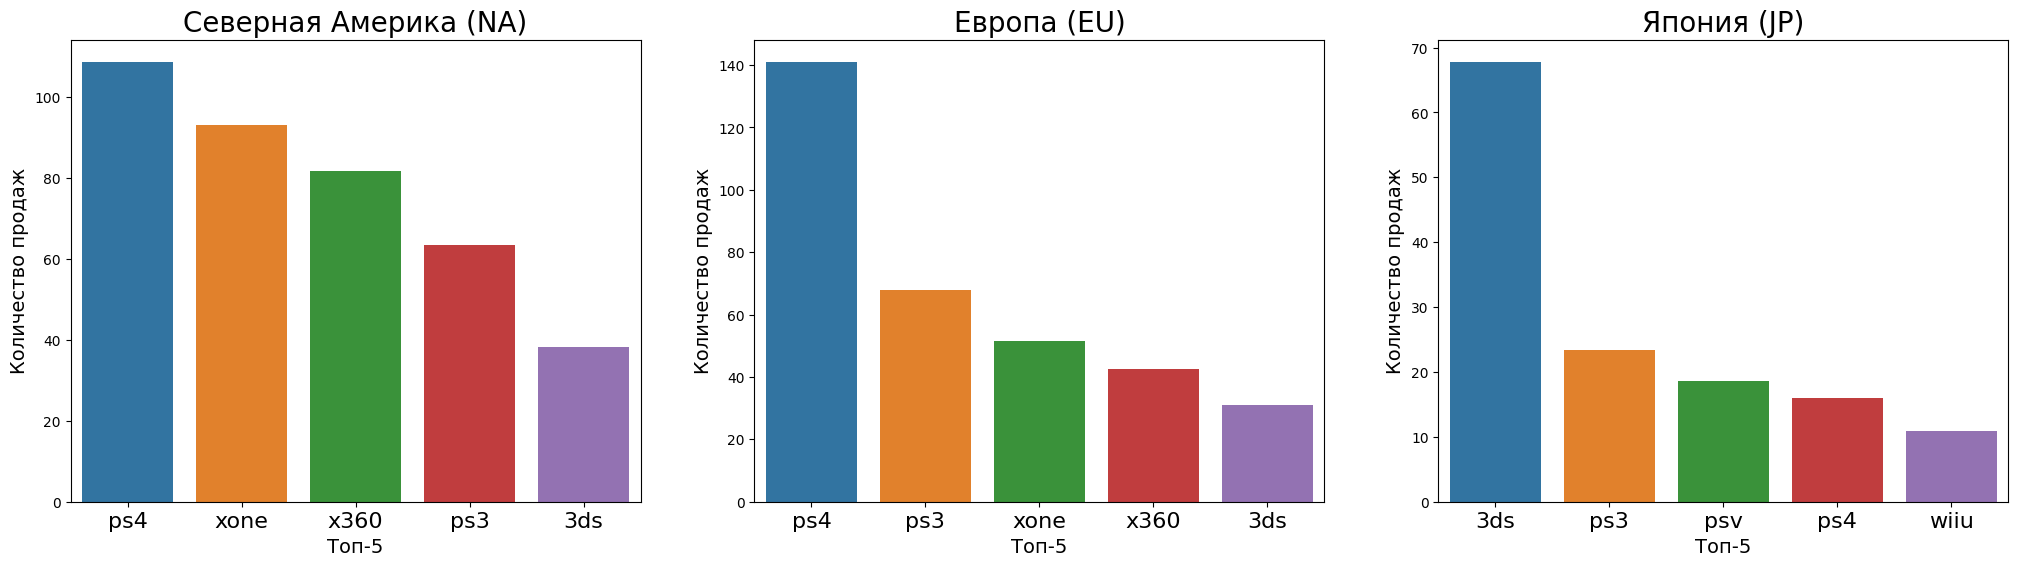

In [69]:
top_in_regions_plot('platform')

В Северной Америке (NA) лидирую приставки **ps4** и **xone**. Далее идут представители прошлого поколения **х360**, **ps3** и **3ds** соответвенно.

В Европе (EU) **Sony PlayStation** получили большую популярность по сравнению с **Xbox**. С огромным отрывом 1-е место занимает **ps4**, за ним следует **ps3**. Далее **xone**, **x360** и **3ds**.

В Японии (JP) лидирует с огромным отрывом местная платформа от **Nintendo**: **3ds**. Далее идут **ps3**, **psv**, **ps4** и **wiiu**.

### Самые популярные жанры (топ-5)

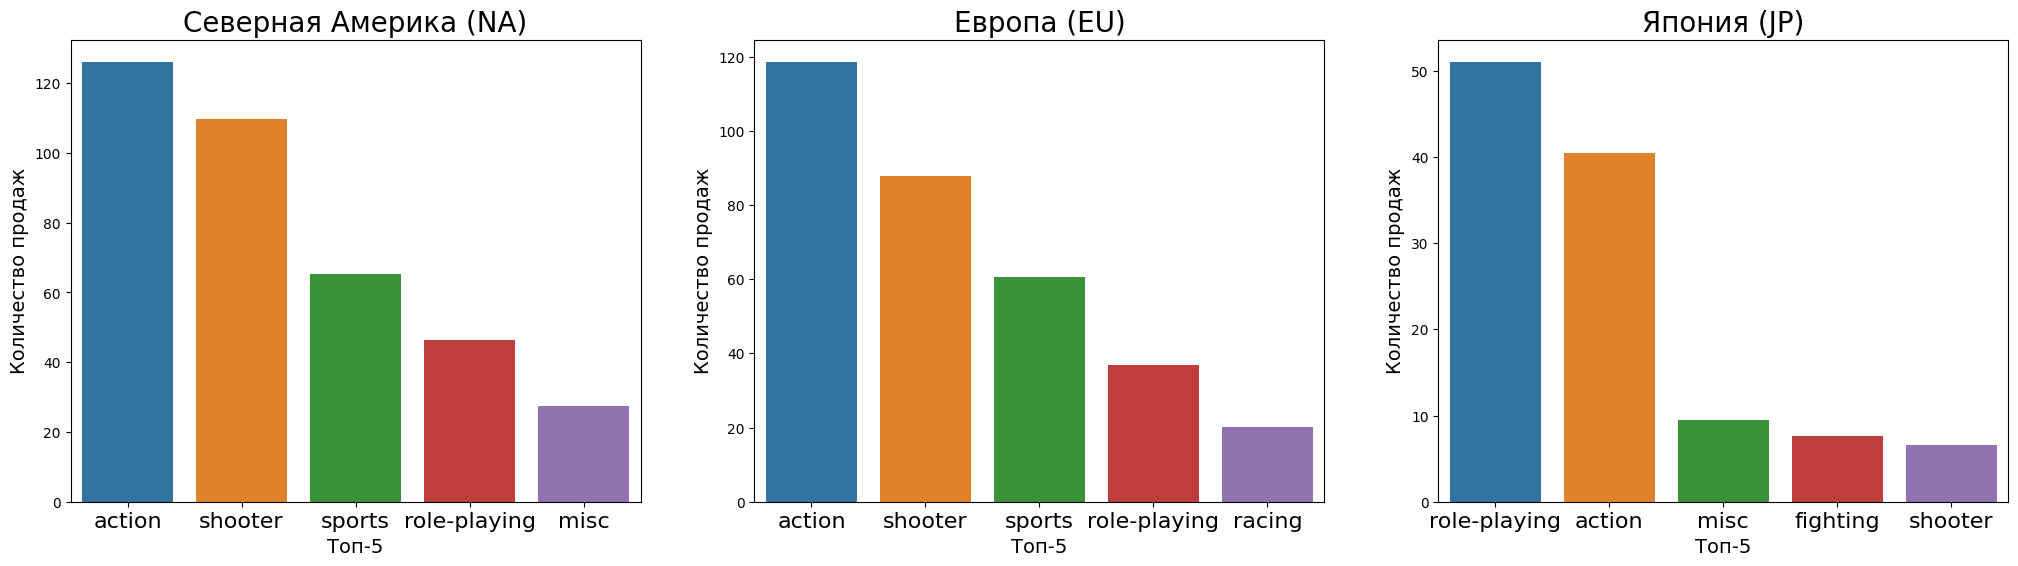

In [70]:
top_in_regions_plot('genre')

Предпочтения в жанре игр у игроков Северной Америки (NA) и Европы (EU) схожи. Четверка лидеров это **action**, **shooter**, **sports** и **role-playing**. На 5-м месте в Северной Америке расположился жанр **misc**, а в Европе - **racing**.

В Японии (JP) на первом месте расположился жанр **role-playing**. За ним сразу следует **action**. Замыкает топ **misc**, **fighting** и **shooter**.

### Самые популярные рейтинги

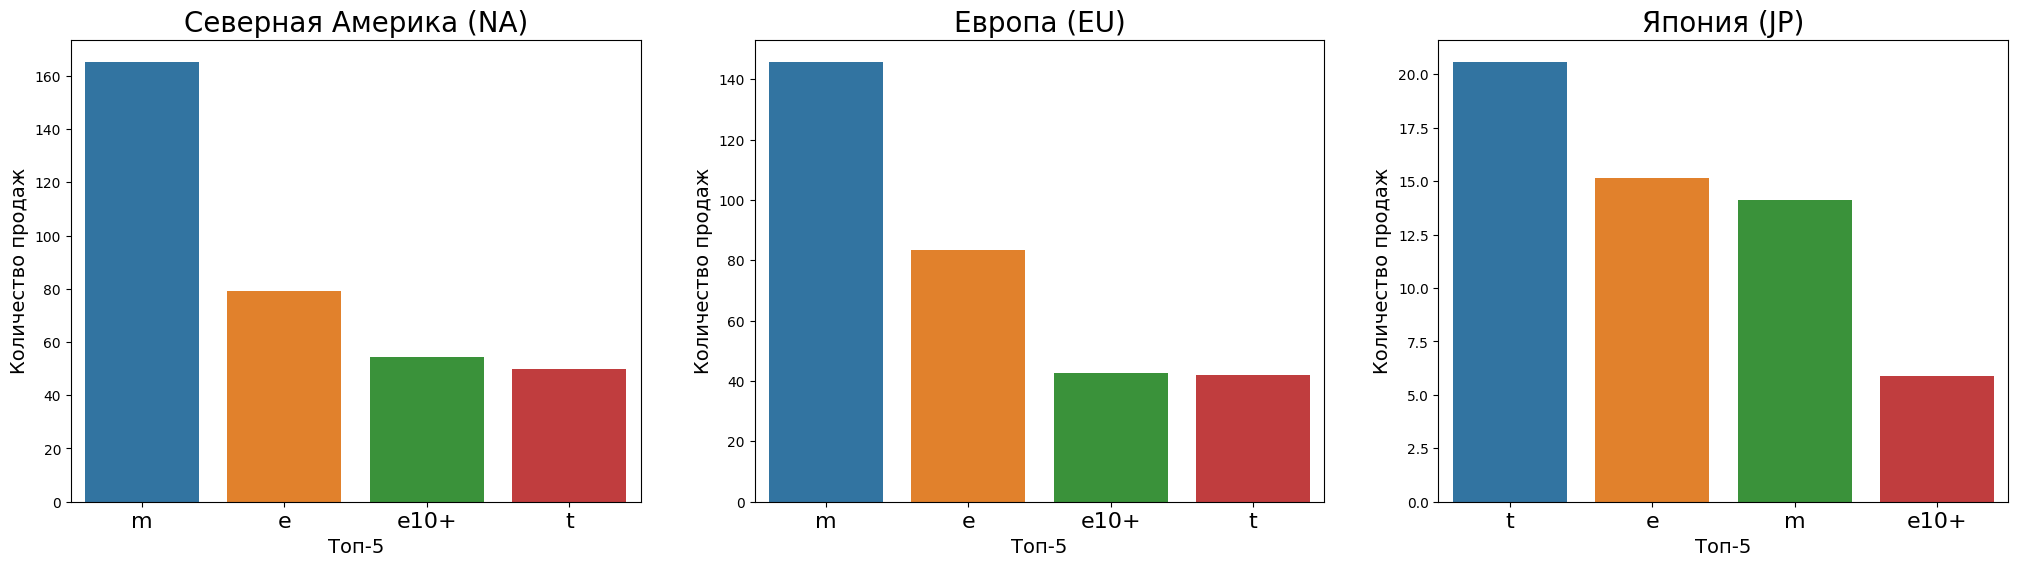

In [71]:
top_in_regions_plot('rating')

В Северной Америке (NA) и Европе (EU) ситуации по рейтингу идентичные: лидирует рейтинг **M** *(от 17 лет)*. За ним следует рейтинг **Е** *(для всех возрастов)*. И замыкает топ: **Е10+** *(от 10 лет)* и **T** *(от 13 до 19 лет)*.

в Японии (JP) на 1-м месте рейтинг **T** *(от 13 до 19 лет)*. Далее рейтинг **Е** *(для всех возрастов)* и **M** *(от 17 лет)* и замыкает топ **Е10+** *(от 10 лет)*.

**Вывод по портретам пользователя каждого региона (NA, EU, JP):**

Проведя анализ по регионам можем составить портрет пользователя каждого региона:
- Северная америка (NA) - играет в игры **action** и **shooter** с рейтингом **M** *(от 17 лет)* на **ps4** и **xone**. 
- Европа (EU) - играет в игры **action** и **shooter** с рейтингом **M** *(от 17 лет)* на **ps4**. 
- Япония (JP) - играет в игры **role-playing** и **action** с рейтингом **T** *(от 13 до 19 лет)* на **3ds**.

## Проверим гипотезы

### Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые.

Сформулируем нулевые гипотезы:

- Нулевая гипотеза: Средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые.
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ **Xbox One** и **PC** различаются.

In [72]:
xone_hyp = actual_period[(actual_period['platform']=='xone')]['user_score']
pc_hyp = actual_period[(actual_period['platform']=='pc')]['user_score']

In [73]:
print('Средняя пользовательская оценка на платформе Xbox One {}.'
      .format(round(xone_hyp.agg('mean'), 2)))

Средняя пользовательская оценка на платформе Xbox One 6.52.


In [74]:
print('Средняя пользовательская оценка на платформе PC {}.'
      .format(round(pc_hyp.agg('mean'), 2)))

Средняя пользовательская оценка на платформе PC 6.28.


In [75]:
alpha = 0.05
results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Есть достаточно оснований, чтобы отклонить нулевую гипотезу, принимаем альтернативную гипотезу.')
else:
    print('Нет достаточно оснований, чтобы отклонить нулевую гипотезу.') 

p-значение: 0.16174359801784316
Нет достаточно оснований, чтобы отклонить нулевую гипотезу.


**Вывод:** Значение p-value чуть больше 16%, т.о. средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые.

### Средние пользовательские рейтинги жанров *Action* и *Sports* разные.

Сформулируем нулевые гипотезы:

- Нулевая гипотеза: Средние пользовательские рейтинги жанров **Action** и **Sports** одинаковые.
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров **Action** и **Sports** различаются.

In [76]:
action_hyp = actual_period[(actual_period['genre']=='action')]['user_score']
sports_hyp = actual_period[(actual_period['genre']=='sports')]['user_score']

In [77]:
print('Средняя пользовательская оценка жанра Action {}.'
      .format(round(action_hyp.agg('mean'), 2)))

Средняя пользовательская оценка жанра Action 6.84.


In [78]:
print('Средняя пользовательская оценка жанра Sports {}.'
      .format(round(sports_hyp.agg('mean'), 2)))

Средняя пользовательская оценка жанра Sports 5.24.


In [79]:
alpha = 0.05
results = st.ttest_ind(action_hyp.dropna(), sports_hyp.dropna(), equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Есть достаточно оснований, чтобы отклонить нулевую гипотезу, принимаем альтернативную гипотезу.')
else:
    print('Нет достаточно оснований, чтобы отклонить нулевую гипотезу.') 

p-значение: 1.3883444596405356e-20
Есть достаточно оснований, чтобы отклонить нулевую гипотезу, принимаем альтернативную гипотезу.


**Вывод:** Средние пользовательские рейтинги жанров **Action** и **Sports** различаются.

**Вывод по проверке гипотез:**

Проверили гипотезы с помощью функции `ttest_ind`, вычисляющей t-тест двух независимых выборок. Значение alpha установили `0.05`:
- средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые;
- средние пользовательские рейтинги жанров **Action** и **Sports** различаются.

## Общий вывод

**Вывод по файлу:** В нашем распоряжении датафрейм на 16715 строк с информацией об играх (название, платформа, дата выхода, оценки критиков, продажи и др.). Есть ряд наблюдений по датафрейму:
- типы переменных:
    - категориальный: **Name**, **Platform**, **Genre**, **Rating**;
    - количественный: **Year_of_Release**, **NA_sales**, **EU_sales**, **JP_sales**, **Other_sales**, **Critic_Score**, **User_Score**.
- пропуски по столцам **Name**, **Year_of_Release**, **Genre**, **Critic_Score**, **User_Score**, **Rating**:
    - пропуски в столбцах **Name** и **Genre**. Это строки 659 и 14244. Возможно это одна и также игра (год и платформа совпадают). В одной строке храняться данные о продажах в Европе, Америке и иные продажи, а во второй - только по Японии;
    - пропуски в столбце **Year_of_Release**: Аггрегатор игр мог не получить информацию от создателей и/или издателей игр;
    - пропуски в столбцах **Critic_Score**, **User_Score** и **Rating**. Культура оценки критиками игр официально появилась ближе ко второй половине 90-х годов (IGN - 1996, Igromania - 1997, Metacritic - 1998). Поэтому игры выпущенные ранее могли остаться без оценок. Entertainment Software Rating Board - ассоциация, присуждающая рейтинги играм была основана в 1994 году.
- неверные типы столбцов **Year_of_Release** и **User_Score**. Год - целое число, а оценка критика - вещественное;
- назваия столбцов не придерживаются `snake_case`. Необходимо привести их к нижнему регистру;
- столбцы **Name**, **Platform**, **Genre**, **Rating** также необходимо привести к нижнему регисту и повторно проверить на дубликаты.



**Вывод по подготовке данных:** 
- названия столбцов и сами столбцы **name**, **platform**, **genre**, **rating** привели к нижнему регистру;
- изменили типы столбцов **year_of_release** и **user_score** на *int* и *float* соответственно;
- удалили пропуски в столбцах **name**, **genre** и **year_of_release**;
- в столбце **year_of_release** удалось частично восстановить данные за счет тех же игр, но выпущенных на других платформах;
- пропуски в столбцах **critic_score**, **user_score**  и **rating** восстановить не представляется возможным. Оставили без изменений;
- удалили аномалии;
- удалили дубликаты;
- создали отдельный столбец **total_sales** с суммарными продажами.


**Вывод по исследовательскому анализу:**
1. Количество игр на разные платформы начало расти с большой скоростью с 90х годов до 2008 года. После кризиса 2008 года многие игровые студии закрылись, некоторые переориентировались на мобильные приложения и игры, что сказалось на общем объеме;
2. Самые популярные игровые платформы за весь период : **Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation**;
3. Средний период 'жизни' платформы длится 8-12 лет. Пик продаж наступает через 4-6 лет после выхода платформы;
4. Из лидеров продаж только **Xbox 360**, **Sony Playstation 3** и **Nintendo Wii** имеют продажи в 2016 году, остальные платформы себя изжили;
5. В качестве актуального периода для дальнейшего анализа взяли 2013-2016 года;
6. Топ платформ по миру: **Sony Playstation 4**, **Sony Playstation 3**, **Xbox ONE**, **Xbox 360**, **Personal Computer** и **Nintendo 3DS** за актуальный период. Платформы выбирались на основе успехов их предшественников;
6. Разница в продажах отличается. Имеются хиты, которые продаются годами и дают много прибыли, таковых единицы. И много игр, которые не смогли преодолеть порог в 400 тыс. долларов за актуальный период с 2013 по 2016;
7. У анализируемых нами платформ (**Sony Playstation 4**, **Xbox ONE**, **Personal Computer**, **Nintendo Wii U**, **Nintendo 3DS** и **PlayStation Vita**) наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли;
8. Самыми прибыльными жанрами можно считать **Shooter**, **Platform** и **Sports**. Жанр **Action** очень зависит от бестселлеров. **Strategy**, **Puzzle** и **Adventure** замыкают рейтинг.


Можно сказать, что на 2017 год ожидается подъем продаж на платформах выбранного топа: **Sony Playstation 4**, **Xbox ONE**, **Personal Computer**, **Nintendo Wii U**, **Nintendo 3DS** и **PlayStation Vita**.


**Вывод по портретам пользователя каждого региона (NA, EU, JP):**

Проведя анализ по регионам можем составить портрет пользователя каждого региона:
- Северная америка (NA) - играет в игры **Action** и **Shooter** с рейтингом **M** *(от 17 лет)* на **PS4** и **XOne**. 
- Европа (EU) - играет в игры **Action** и **Shooter** с рейтингом **M** *(от 17 лет)* на **PS4**. 
- Япония (JP) - играет в игры **Role-Playing** и **Action** с рейтингом **T** *(от 13 до 19 лет)* на **3DS**.

**Самые популярные платформы (топ-5)**

В Северной Америке (NA) лидирую приставки **PS4** и **XOne**. Далее идут представители прошлого поколения **X360**, **PS3** и **3DS** соответвенно.

В Европе (EU) **Sony PlayStation** получили большую популярность по сравнению с **Xbox**. С огромным отрывом 1-е место занимает **PS4**, за ним следует **PS3**. Далее **XOne**, **X360** и **3DS**.

В Японии (JP) лидирует с огромным отрывом местная платформа от **Nintendo**: **3DS**. Далее идут **PS3**, **PSV**, **PS4** и **WiiU**.

**Самые популярные жанры (топ-5)**

Предпочтения в жанре игр у игроков Северной Америки (NA) и Европы (EU) схожи. Четверка лидеров это **Action**, **Shooter**, **Sports** и **Role-Playing**. На 5-м месте в Северной Америке расположился жанр **Misc**, а в Европе - **Racing**.

В Японии (JP) на первом месте расположился жанр **Role-Playing**. За ним сразу следует **Action**. Замыкает топ **Misc**, **Fighting** и **Shooter**.

**Самые популярные рейтинги**

В Северной Америке (NA) и Европе (EU) ситуации по рейтингу идентичные: лидирует рейтинг **M** *(от 17 лет)*. За ним следует рейтинг **Е** *(для всех возрастов)*. И замыкает топ: **Е10+** *(от 10 лет)* и **T** *(от 13 до 19 лет)*.

в Японии (JP) на 1-м месте рейтинг **T** *(от 13 до 19 лет)*. Далее рейтинг **Е** *(для всех возрастов)* и **M** *(от 17 лет)* и замыкает топ **Е10+** *(от 10 лет)*.

**Вывод по проверке гипотез:**

Проверили гипотезы с помощью функции `ttest_ind`, вычисляющей t-тест двух независимых выборок. Значение alpha установили `0.05`:
- средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые:
    - средняя пользовательская оценка на платформе **Xbox One** 6.52;
    - средняя пользовательская оценка на платформе **PC** 6.28.
- средние пользовательские рейтинги жанров **Action** и **Sports** различаются:
    - средняя пользовательская оценка жанра Action 6.84;
    - средняя пользовательская оценка жанра Sports 5.24.
    
**Прогноз на 2017 год:**
- делать основной акцент на современные платформы: **Sony Playstation 4** и **Xbox ONE**;
- для увеличения ассортимента можно закупить игры на платформы **Nintendo 3DS**, **Nintendo Wii U** и **PlayStation Vita**;
- отдельно стоит отметить **Personal Computer**. Спрос на игры данной платформы будет еще долгое время;
- в Северной Америке и Европе стоит делать акцент на жанры **Action**, **Shooter**, **Sports** и **Role-Playing**. В Японии - **Role-Playing** и **Action**;
- в плане прибыли жанры **Shooter**, **Platform** и **Sports** более стабильны в отличие от **Action**, который очень зависим от бестселлеров;
- в Северной Америке и Европе предпочитают игры для лиц старше 17 лет. В Японии - старше 13 лет.

При анализе необходимо делать акцент не только на данные, но и на новости о потенциальных разработках консолей. Например: в октябре 2016 года компания *Nintendo* презентовала новую консоль **Nintendo Switch** со стартом продаж в первом квартала 2017 года. **Nintendo Switch** является первой гибридной консолью, т.е. она может подключаться к телевизору как традиционное консоли, так и использоваться как портативная консоль. Считается преемником **Nintendo Wii U**, а значит продажи на **Nintendo Wii U** и **Nintendo 3DS** будут падать.

Для более детального рассчета прибыли так же можно рассмотреть продажи в момент перехода с одного поколения консоли на другой. Рассмотреть количество проданных консолей нового поколения, с какими игровыми студиями заключен контракт на разработку игр для консоли нового поколения. На примерах консолей прошлых поколений можно рассмотреть как долго велась поддержка консоли предшественника.